# Importing Required Modules

The following cell imports all necessary Python modules and project-specific packages used throughout this notebook, including numpy, pandas, matplotlib, scipy, and ADM1 model utilities.

In [1]:
# Import required modules
from adm1.influent import get_influent
from adm1.initial_state import get_initial_state
import importlib
import adm1.coAD as coAD
importlib.reload(coAD)
from adm1.params import calculate_CN_ratio

from plot_utils import *
from adm1.coAD import ADM1_coAD


# ADM1 Model Inputs

The following cell defines all input parameters required to run the ADM1 co-digestion model, including operational settings, feed characteristics, and initial states. These variables are used as arguments for ADM1 simulations throughout the notebook.

In [14]:
q_ad_init=193.3       # Initial influent flow rate [m^3/d]
density=1              # Influent density [tonne/m^3]
VS_per_TS_PS=0.986            # Volatile solids per  total solids [kg VS/kg TS]     
VS_per_TS_SS=0.851            # Volatile solids per  total solids [kg VS/kg TS]     
TS_fraction=0.1        # Fraction of TS in influent
mixing_ratio=0.999999   # Fraction for feed 1 / total (can be overridden per scenario)
mixing_ratio2=0.9     # Fraction for PS / total (can be overridden per scenario)
OLR=4                    # Organic Loading Rate [kg VS/m3/d]
T_ad =  308.15 #K
T_base =  298.15 #K
T_op =  T_ad #k ##T_ad #=35 C
#influent=None              # Optional: pass custom influent dict
#initials=None              # Optional: pass custom initial state dict
VSS=None                    # Optional: pass custom VSS value
days=250                  # Number of days to simulate
timesteps= "Hour(s)"         #"Day(s)", "15 Minute(s)","Hour(s)"
V_liq=None
recycle_ratio=0       # Fraction of recycle flow rate to influent flow rate
Batch_process=False     # If True, simulate a batch process (no influent flow)
param_overrides=None
disable_inhibition=False

In [15]:
influent = get_influent(mixing_ratio, mixing_ratio2)
initials = get_initial_state(mixing_ratio)

In [4]:
print("Influent:", influent)
print("Initial state:", initials)

Influent: {'S_su_in': 0.001, 'S_aa_in': 0.001, 'S_fa_in': 0.001, 'S_va_in': 0.001, 'S_bu_in': 0.001, 'S_pro_in': 0.001, 'S_ac_in': 0.001, 'S_h2_in': 1e-08, 'S_ch4_in': 1e-05, 'S_co2_in': 1e-05, 'S_IC_in': 0.04, 'S_IN_in': 0, 'S_I_in': 0.02, 'X_xc1_in': 0.0, 'X_ch1_in': 68.47785504408445, 'X_pr1_in': 2.668263090295082, 'X_li1_in': 27.9596178001927, 'X_xc2_in': 0.0, 'X_ch2_in': 0.00020539368000590627, 'X_pr2_in': 4.783852800137563e-05, 'X_li2_in': 6.759792000194383e-06, 'X_su_in': 0.0, 'X_aa_in': 0.0, 'X_fa_in': 0.0, 'X_c4_in': 0.0, 'X_pro_in': 0.0, 'X_ac_in': 0.0, 'X_h2_in': 0.0, 'X_I_in': 239.22360642876595, 'S_cation_in': 0.04, 'S_anion_in': 0.02, 'S_nh3_in': 0.0}
Initial state: {'S_su': 1e-05, 'S_aa': 1e-05, 'S_fa': 1e-05, 'S_va': 1e-05, 'S_bu': 1e-05, 'S_pro': 1e-05, 'S_ac': 1e-05, 'S_h2': 1e-08, 'S_ch4': 1e-05, 'S_IC': 0.04, 'S_IN': 0.01, 'S_I': 0.02, 'X_xc1': 6.24999375e-07, 'X_ch1': 1.5624984375000002e-06, 'X_pr1': 6.249993750000001e-06, 'X_li1': 1.5624984375000002e-06, 'X_xc2': 

In [5]:
from adm1.influent import reactor_setup


# --- Set up reactor for this scenario ---
reactor = reactor_setup(
influent,               # Influent scenario function
initials,          # Initial state scenario function
q_ad_init,                # Initial influent flow rate [m^3/d]
density,                    # Influent density [tonne/m^3]
VS_per_TS_PS,                # Volatile solids per  total solids [kg VS/kg TS]    
VS_per_TS_SS,                # Volatile solids per  total solids [kg VS/kg TS]    
TS_fraction,         # Fraction of water in influent
mixing_ratio,   # Fraction for feed 1 # feed1 / total (can be overridden per scenario)
mixing_ratio2,   # Fraction for PS # PS / total (can be overridden per scenario)
OLR,                        # Organic Loading Rate [kg VS/m3/d]
recycle_ratio,                # Recycle ratio [m^3/d]
Batch_process,                # If True, simulate a batch process (no influent flow)
VSS=None,                            # Optional: pass custom VSS value
V_liq=None,                            # Optional: pass custom reactor liquid volume [m^3]
)


# --- Set up reactor for this scenario ---

q_in = reactor['q_in']
q_in1 = reactor['q_in1']
q_in2 = reactor['q_in2']
q_ad = reactor['q_ad']
q_out = reactor['q_out']
q_r = reactor['q_r']
VS_in = reactor['VS_in']
HRT = reactor['HRT']
V_liq = reactor['V_liq']
V_gas = reactor['V_gas']
V_ad = reactor['V_ad']
TS = reactor['TS']
VSS = reactor['VSS']
TS_fraction_initial = reactor['TS_fraction_initial']

In [ ]:
print("q_in:", q_in)
print("q_in1:", q_in1)
print("q_in2:", q_in2)
print("q_ad:", q_ad)
print("q_out:", q_out)
print("q_r:", q_r)
print("VS_in:", VS_in)
print("HRT:", HRT)
print("V_liq:", V_liq)
print("V_gas:", V_gas)
print("V_ad:", V_ad)
print("TS:", TS)
print("VSS:", VSS)
print("TS_fraction_initial:", TS_fraction_initial)

In [ ]:
# Calculation for mixing_ratio = 1, mixing_ratio2 = 0.5
from adm1.params import get_VSS



VS_per_TS_Mix=mixing_ratio2 * VS_per_TS_PS + (1 - mixing_ratio2) * VS_per_TS_SS

total_COD=331.188518



# Primary sludge (PS)


X_xc1_total_PS = total_COD/(2*mixing_ratio2+1/mixing_ratio2-2)
X_ch1_fraction_PS = 0.2072
X_pr1_fraction_PS = 10 ** -8
X_li1_fraction_PS = 0.0829
X_I1_in_PS= 1-(X_ch1_fraction_PS + X_pr1_fraction_PS + X_li1_fraction_PS)


X_xc1_in_PS = mixing_ratio * 0
X_ch1_in_PS = mixing_ratio * X_ch1_fraction_PS * X_xc1_total_PS
X_pr1_in_PS = mixing_ratio * X_pr1_fraction_PS * X_xc1_total_PS
X_li1_in_PS = mixing_ratio * X_li1_fraction_PS * X_xc1_total_PS
X_I1_in_PS  = mixing_ratio * X_I1_in_PS * X_xc1_total_PS

print('Primary Sludge (PS):')
print(f'  X_xc1_in_PS = {X_xc1_in_PS}')
print(f'  X_ch1_in_PS = {X_ch1_in_PS}')
print(f'  X_pr1_in_PS = {X_pr1_in_PS}')
print(f'  X_li1_in_PS = {X_li1_in_PS}')
print(f'  X_I1_in_PS  = {X_I1_in_PS}')
print(f'Primary Sludge (PS) Total: {X_xc1_in_PS+X_ch1_in_PS+X_pr1_in_PS+X_li1_in_PS+X_I1_in_PS}')

inf_PS={'X_xc1_in':X_xc1_in_PS, 'X_ch1_in':X_ch1_in_PS, 'X_pr1_in':X_pr1_in_PS, 'X_li1_in':X_li1_in_PS, 'X_I1_in':X_I1_in_PS}
VSS_PS= get_VSS(inf_PS, q_ad_init)
TS_PS=VSS_PS / VS_per_TS_PS
TS_fraction_initial_PS=TS_PS/(q_ad_init * density)


# Secondary sludge (SS)

X_xc1_total_SS = X_xc1_total_PS*(1/mixing_ratio2-1)
X_ch1_fraction_SS = 0.0647
X_pr1_fraction_SS = 0.2822
X_li1_fraction_SS = 0.0697
X_I1_in_SS= 1-(X_ch1_fraction_SS + X_pr1_fraction_SS + X_li1_fraction_SS)


X_xc1_in_SS = mixing_ratio * 0
X_ch1_in_SS = mixing_ratio * X_ch1_fraction_SS * X_xc1_total_SS
X_pr1_in_SS = mixing_ratio * X_pr1_fraction_SS * X_xc1_total_SS
X_li1_in_SS = mixing_ratio * X_li1_fraction_SS * X_xc1_total_SS
X_I1_in_SS  = mixing_ratio * X_I1_in_SS * X_xc1_total_SS


print('Secondary Sludge (SS):')
print(f'  X_xc1_in_SS = {X_xc1_in_SS}')
print(f'  X_ch1_in_SS = {X_ch1_in_SS}')
print(f'  X_pr1_in_SS = {X_pr1_in_SS}')
print(f'  X_li1_in_SS = {X_li1_in_SS}')
print(f'  X_I1_in_SS  = {X_I1_in_SS}')
print(f'Secondary Sludge (SS) Total: {X_xc1_in_SS+X_ch1_in_SS+X_pr1_in_SS+X_li1_in_SS+X_I1_in_SS}')

inf_SS={'X_xc1_in':X_xc1_in_SS, 'X_ch1_in':X_ch1_in_SS, 'X_pr1_in':X_pr1_in_SS, 'X_li1_in':X_li1_in_SS, 'X_I1_in':X_I1_in_SS}
VSS_SS= get_VSS(inf_SS, q_ad_init)
TS_SS=VSS_SS / VS_per_TS_SS
TS_fraction_initial_SS=TS_SS/(q_ad_init * density)

# Mixture
X_xc1_in = mixing_ratio * (mixing_ratio2 * X_xc1_in_PS + (1 - mixing_ratio2) * X_xc1_in_SS)
X_ch1_in = mixing_ratio * (mixing_ratio2 * X_ch1_in_PS + (1 - mixing_ratio2) * X_ch1_in_SS)
X_pr1_in = mixing_ratio * (mixing_ratio2 * X_pr1_in_PS + (1 - mixing_ratio2) * X_pr1_in_SS)
X_li1_in = mixing_ratio * (mixing_ratio2 * X_li1_in_PS + (1 - mixing_ratio2) * X_li1_in_SS)
X_I1_in  = mixing_ratio * (mixing_ratio2 * X_I1_in_PS + (1 - mixing_ratio2) * X_I1_in_SS)

print('Mixture:')
print(f'  X_xc1_in = {X_xc1_in}')
print(f'  X_ch1_in = {X_ch1_in}')
print(f'  X_pr1_in = {X_pr1_in}')
print(f'  X_li1_in = {X_li1_in}')
print(f'  X_I1_in  = {X_I1_in}')
print(f'Mixture Total: {X_xc1_in+X_ch1_in+X_pr1_in+X_li1_in+X_I1_in}')

inf_PPMS={'X_xc1_in':X_xc1_in, 'X_ch1_in':X_ch1_in, 'X_pr1_in':X_pr1_in, 'X_li1_in':X_li1_in, 'X_I1_in':X_I1_in}
VSS_PPMS = get_VSS(inf_PPMS, q_ad_init)
TS_PPMS=VSS_PPMS / VS_per_TS_Mix
TS_fraction_initial_PPMS=TS_PPMS/(q_ad_init * density)


variation_factor4 = 1
X_xc2_total = variation_factor4 * 259.992
X_ch2_fraction = 0.79
X_pr2_fraction = 0.184
X_li2_fraction = 0.026



X_xc2_in = (1 - mixing_ratio) * 0
X_ch2_in = (1 - mixing_ratio) * X_ch2_fraction * X_xc2_total
X_pr2_in = (1 - mixing_ratio) * X_pr2_fraction * X_xc2_total
X_li2_in = (1 - mixing_ratio) * X_li2_fraction * X_xc2_total
X_I2_in = (1 - mixing_ratio) *19.023

print('FW:')
print(f'  X_xc2_in = {X_xc2_in}')
print(f'  X_ch2_in = {X_ch2_in}')
print(f'  X_pr2_in = {X_pr2_in}')
print(f'  X_li2_in = {X_li2_in}')
print(f'  X_I2_in  = {X_I2_in}')
print(f'FW total={X_xc2_in+X_ch2_in+X_pr2_in+X_li2_in+X_I2_in}')

inf_FW={'X_xc2_in':X_xc2_in, 'X_ch2_in':X_ch2_in, 'X_pr2_in':X_pr2_in, 'X_li2_in':X_li2_in, 'X_I2_in':X_I2_in}
VSS_FW= get_VSS(inf_FW, q_ad_init)

print(f'  VSS_PS={VSS_PS}')
print(f'  VSS_SS={VSS_SS}')
print(f'  TS_PS={TS_PS}')
print(f'  TS_SS={TS_SS}')
print(f'  VSS_PPMS = {VSS_PPMS}')
print(f'  VSS_FW = {VSS_FW}')
print(f'  VSS_total = {VSS_FW+VSS_PPMS}')
print(f'  TS_fraction_initial_PS={TS_fraction_initial_PS*100}')
print(f'  TS_fraction_initial_SS={TS_fraction_initial_SS*100}')
print(f'  TS_fraction_initial_PPMS={TS_fraction_initial_PPMS*100}')


In [ ]:
from adm1.params import calculate_CN_ratio

# Example usage:
cn_ratio = calculate_CN_ratio(influent)
print("C/N ratio:", cn_ratio["C/N ratio"])
print("Total C:", cn_ratio["total_C"])
print("Total N:", cn_ratio["total_N"])



# Running ADM1 Simulations

The following cells in this notebook demonstrate how to run the Anaerobic Digestion Model No. 1 (ADM1) using the `ADM1_coAD` function. These cells set up reactor parameters, influent and initial states, and execute the model to simulate co-digestion scenarios. Key outputs such as flow rates, organic loading rate (OLR), hydraulic retention time (HRT), total solids (TS), volatile suspended solids (VSS), biomethane yield, and pH are printed for analysis. The workflow includes:

- Running the ADM1 model for baseline and inhibition-disabled scenarios.
- Extracting and displaying simulation results for further comparison and visualization.

Refer to the code and outputs in the subsequent cells for details on model setup, execution, and result interpretation.

In [16]:
from adm1.coAD import ADM1_coAD

result = ADM1_coAD(
    q_ad_init,
    density,
    VS_per_TS_PS,
    VS_per_TS_SS,
    TS_fraction,
    mixing_ratio,
    mixing_ratio2,
    OLR,
    T_ad,
    T_base,
    T_op,
    recycle_ratio,
    influent=influent,
    initials=initials,
    VSS=VSS,
    days=days,
    timesteps=timesteps,
    V_liq=V_liq,
    param_overrides=param_overrides,
    disable_inhibition=disable_inhibition,
    Batch_process=Batch_process,
)

VS_in: 52.62683758508989
HRT: 24.312499999999996
V_liq: 13156.709396272472
V_gas: 1315.6709396272472
V_ad: 14472.38033589972
TS: 54.115000087496036
VSS: 52.62683758508989
TS_fraction_initial: 0.2799534407009624
0.041673612268711455
0.08334722453742291
0.12502083680613435
0.16669444907484582
0.2083680613435573
0.2500416736122687
0.29171528588098017
0.33338889814969164
0.3750625104184031
0.4167361226871146
0.458409734955826
0.5000833472245374
0.5417569594932489
0.5834305717619603
0.6251041840306718
0.6667777962993833
0.7084514085680947
0.7501250208368062
0.7917986331055177
0.8334722453742291
0.8751458576429405
0.916819469911652
0.9584930821803634
1.0001666944490748
1.0418403067177864
1.0835139189864977
1.1251875312552093
1.1668611435239207
1.2085347557926323
1.2502083680613436
1.2918819803300552
1.3335555925987665
1.375229204867478
1.4169028171361895
1.4585764294049008
1.5002500416736124
1.5419236539423238
1.5835972662110354
1.6252708784797467
1.6669444907484583
1.7086181030171697
1.7502

In [7]:
print(f"mixing_ratio: {mixing_ratio:.2f} [kg PPMS/kg total]")
print(f"mixing_ratio2: {mixing_ratio2:.2f} [kg PS/kg total]")
cn_result = calculate_CN_ratio(influent)
print(f"CN_ratio: {cn_result['C/N ratio']:.2f}")
calculate_CN_ratio(influent)
print(f"TS_fraction_initial: {result['TS_fraction_initial']:.2f} [kg TS/kg]")
print(f"TS: {result['TS']:.2f} [tonne/d]")
print(f"VSS: {result['VSS']:.2f} [tonne/d]")
print(f"VS_in: {result['VS_in']:.2f} [tonne/d]")
print(f"q_in1: {result['q_in1']:.2f} [m^3/d]")
print(f"q_in2: {result['q_in2']:.2f} [m^3/d]")
print(f"q_in: {result['q_in']:.2f} [m^3/d]")
print(f"q_recycle: {result['q_recycle']:.2f} [m^3/d]")
print(f"q_ad: {result['q_ad']:.2f} [m^3/d]")
print(f"q_out: {result['q_out']:.2f} [m^3/d]")
print(f"OLR: {OLR:.2f} [kg VS/m^3/d]")
print(f"HRT: {result['HRT']:.2f} [d]")
print(f"V_liq: {result['V_liq']:.2f} [m^3]")
print(f"V_gas: {result['V_gas']:.2f} [m^3]")
print(f"V_ad: {result['V_ad']:.2f} [m^3]")
#print(f"X_xc1: {result['X_xc1']:.2f} [kg COD/m^3]")
#print(f"X_xc2: {result['X_xc2']:.2f} [kg COD/m^3]")
print(f"VS_out: {result['VS_out']:.2f} [tonne/d]")
print(f"VS_reduction: {result['VS_reduction']:.2f} [%]")
print(f"q_ch4: {result['q_ch4']:.2f} [m^3/d]")
print(f"biomethane_yield: {result['biomethane_yield']:.2f} [m^3 CH4/kg VS]")
print(f"pH (last timestep): {float(result['simulate_results']['pH'].iloc[-1]):.2f} [-]")
print(f"S_IN (last timestep): {float(result['simulate_results']['S_IN'].iloc[-1]):.2f} [-]")
print(f"S_gas_ch4 (last timestep): {float(result['simulate_results']['S_gas_ch4'].iloc[-1]):.5f} [-]")
print(f"S_ch4 (last timestep): {float(result['simulate_results']['S_ch4'].iloc[-1]):.5f} [-]")
print(f"p_gas_ch4 (last timestep): {result['p_gas_ch4']:.2f} [-]")
print(f"I_IN_lim (last timestep): {float(result['inhibition']['I_IN_lim'].iloc[-1]):.2f} [-]")


mixing_ratio: 1.00 [kg PPMS/kg total]
mixing_ratio2: 0.90 [kg PS/kg total]
CN_ratio: 444.48
TS_fraction_initial: 0.28 [kg TS/kg]
TS: 54.12 [tonne/d]
VSS: 52.63 [tonne/d]
VS_in: 52.63 [tonne/d]
q_in1: 541.15 [m^3/d]
q_in2: 0.00 [m^3/d]
q_in: 541.15 [m^3/d]
q_recycle: 0.00 [m^3/d]
q_ad: 541.15 [m^3/d]
q_out: 541.15 [m^3/d]
OLR: 4.00 [kg VS/m^3/d]
HRT: 24.31 [d]
V_liq: 13156.71 [m^3]
V_gas: 1315.67 [m^3]
V_ad: 14472.38 [m^3]
VS_out: 53.63 [tonne/d]
VS_reduction: -1.91 [%]
q_ch4: 0.00 [m^3/d]
biomethane_yield: 0.00 [m^3 CH4/kg VS]
pH (last timestep): 6.10 [-]
S_IN (last timestep): 0.00 [-]
S_gas_ch4 (last timestep): 0.00003 [-]
S_ch4 (last timestep): 0.00000 [-]
p_gas_ch4 (last timestep): 0.00 [-]
I_IN_lim (last timestep): 0.01 [-]


In [9]:
print(f"I_pH_h2 (last timestep): {float(result['inhibition']['I_pH_h2'].iloc[-1]):.5f} [-]")
print(f"I_IN_lim (last timestep): {float(result['inhibition']['I_IN_lim'].iloc[-1]):.5f} [-]")
print(f"I_h2_fa (last timestep): {float(result['inhibition']['I_h2_fa'].iloc[-1]):.5f} [-]")
print(f"I_h2_c4 (last timestep): {float(result['inhibition']['I_h2_c4'].iloc[-1]):.5f} [-]")
print(f"I_h2_pro (last timestep): {float(result['inhibition']['I_h2_pro'].iloc[-1]):.5f} [-]")
print(f"I_pH_aa (last timestep): {float(result['inhibition']['I_pH_aa'].iloc[-1]):.5f} [-]")
print(f"I_pH_ac (last timestep): {float(result['inhibition']['I_pH_ac'].iloc[-1]):.5f} [-]")
print(f"I_nh3 (last timestep): {float(result['inhibition']['I_nh3'].iloc[-1]):.5f} [-]")

I_pH_h2 (last timestep): 1.00000 [-]
I_IN_lim (last timestep): 0.00856 [-]
I_h2_fa (last timestep): 1.00000 [-]
I_h2_c4 (last timestep): 1.00000 [-]
I_h2_pro (last timestep): 1.00000 [-]
I_pH_aa (last timestep): 1.00000 [-]
I_pH_ac (last timestep): 0.08841 [-]
I_nh3 (last timestep): 1.00000 [-]


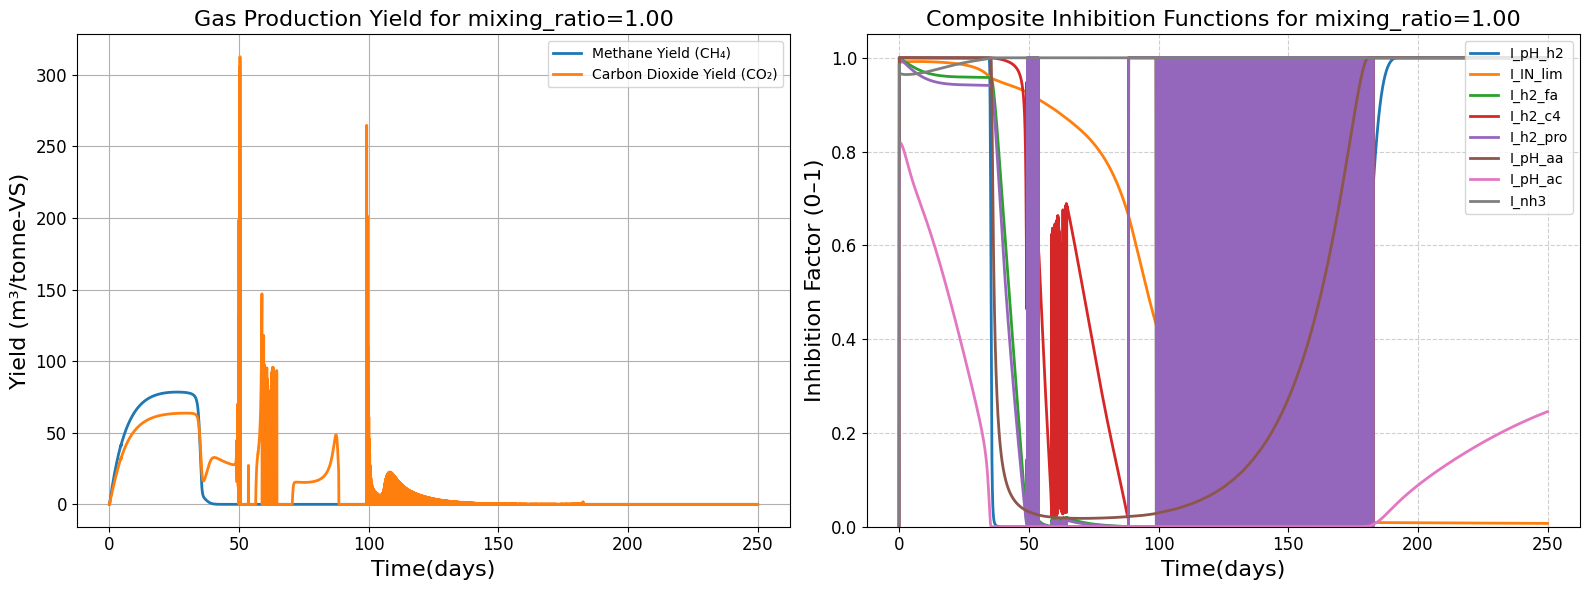

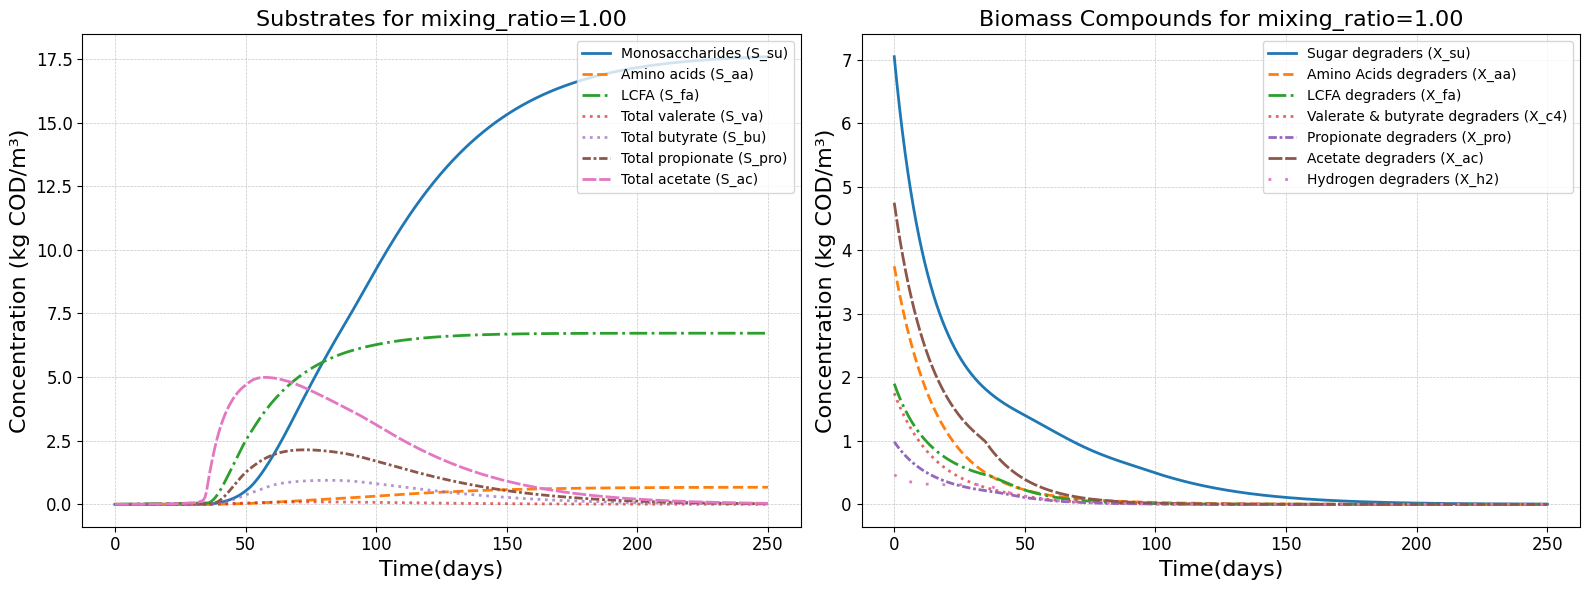

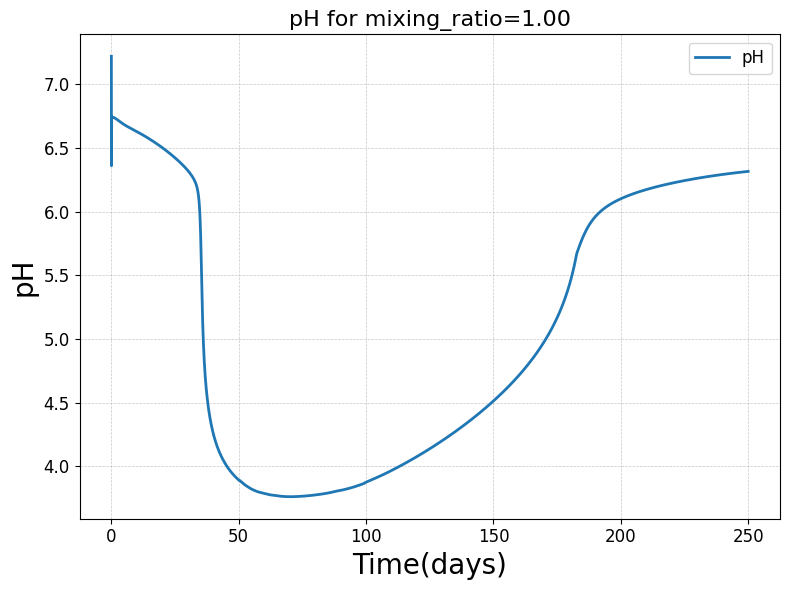

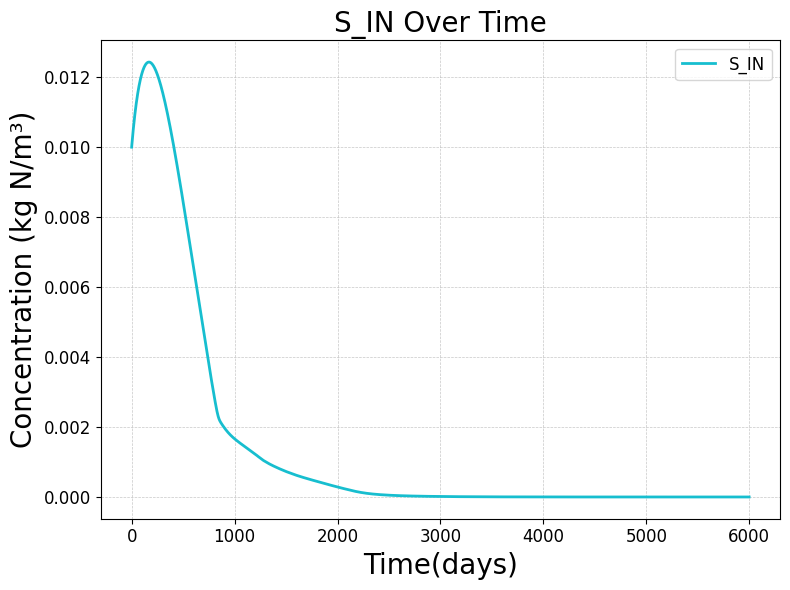

In [17]:
plot_gas_and_inhibition(result['gasflow'], result['inhibition'], mixing_ratio, result['u'], timesteps)
plot_biomass_and_substrate(result['simulate_results'], mixing_ratio, result['u'], timesteps)
plot_ph(result['simulate_results'], mixing_ratio, result['u'], timesteps)
plot_s_in(result['simulate_results'])


In [ ]:
print('Timesteps('+"15 Minute(s)"+")")

In [ ]:
# Side-by-side table: orig_influent, new_influent, recycled_effluent, mixed_influent, gas_effluent plus unit column
import pandas as pd
import numpy as np
from adm1.params import get_VSS

res = result  # assuming result dict present

new_influent = res.get('new_influent', {}) or {}
orig_influent = globals().get('influent', {}) or {}

mih = res.get('mixed_influent_history', None)
if mih is not None and hasattr(mih, 'iloc') and len(mih) > 0:
    mixed_last_row = mih.iloc[-1].to_dict()
else:
    mixed_last_row = {}

sim_df = res.get('simulate_results', None)
if sim_df is not None and hasattr(sim_df, 'iloc') and len(sim_df) > 0:
    eff_last_row = sim_df.iloc[-1].to_dict()
else:
    eff_last_row = {}

# Helper to normalize key names (strip trailing _in)
def base_name(k: str):
    return k[:-3] if k.endswith('_in') else k

# Collect all species keys (using base names)
all_keys = set()
for d in (new_influent, orig_influent, mixed_last_row, eff_last_row):
    for k in d.keys():
        all_keys.add(base_name(k))

# Build rows
rows = []
for bk in sorted(all_keys):
    def pick(d, suffix_ok=True):
        if not d:
            return np.nan
        if bk in d:
            return d[bk]
        if suffix_ok:
            ki = f"{bk}_in"
            if ki in d:
                return d[ki]
        return np.nan
    v_new = pick(new_influent)
    v_mix = pick(mixed_last_row)
    v_eff = pick(eff_last_row, suffix_ok=False)
    v_orig = pick(orig_influent)

    def to_float(x):
        try:
            if isinstance(x, (list, tuple, np.ndarray)):
                if len(x) == 0:
                    return np.nan
                x = x[-1]
            return float(x)
        except Exception:
            return np.nan

    rows.append({
        'species': bk,
        'new_influent': to_float(v_new),
        'mixed_influent': to_float(v_mix),
        'recycled_effluent': to_float(v_eff),
        'orig_influent': to_float(v_orig),
    })

comp_table = pd.DataFrame(rows)
mask_all_nan = comp_table[['new_influent','mixed_influent','recycled_effluent','orig_influent']].isna().all(axis=1)
comp_table = comp_table[~mask_all_nan].reset_index(drop=True)

ion_exclusions = {
    'S_ac_ion','S_bu_ion','S_va_ion','S_pro_ion','S_hco3_ion','S_nh3','S_nh4_ion',
    'S_cation','S_anion','S_co2'
}
comp_table = comp_table[~comp_table['species'].isin(ion_exclusions)].reset_index(drop=True)
comp_table = comp_table[~comp_table['species'].isin({'pH','time'})].reset_index(drop=True)

gas_species = {'S_gas_ch4','S_gas_co2','S_gas_h2'}
comp_table['gas_effluent'] = np.nan
mask_gas = comp_table['species'].isin(gas_species)
comp_table.loc[mask_gas, 'gas_effluent'] = comp_table.loc[mask_gas, 'recycled_effluent']
comp_table.loc[mask_gas, 'recycled_effluent'] = np.nan

priority_order = [
    'S_su','S_aa','S_fa','S_va','S_bu','S_pro','S_ac','S_h2','S_ch4','S_IC','S_IN','S_I',
    'X_su','X_aa','X_fa','X_c4','X_pro','X_ac','X_h2','X_I'
]
non_gas = comp_table[~comp_table['species'].isin(gas_species)].copy()
remaining = [k for k in non_gas['species'] if k not in priority_order]
ordered_non_gas = priority_order + remaining
non_gas['species_rank'] = non_gas['species'].apply(lambda x: ordered_non_gas.index(x) if x in ordered_non_gas else 10**6)
non_gas = non_gas.sort_values('species_rank').drop(columns='species_rank')

gas_rows = comp_table[comp_table['species'].isin(gas_species)].copy()
if not gas_rows.empty:
    gas_order = ['S_gas_ch4','S_gas_co2','S_gas_h2']
    gas_rows['gas_rank'] = gas_rows['species'].apply(lambda x: gas_order.index(x) if x in gas_order else 10**3)
    gas_rows = gas_rows.sort_values('gas_rank').drop(columns='gas_rank')

comp_table = pd.concat([non_gas, gas_rows], ignore_index=True)

# Add unit mapping
unit_map = {
    # Soluble substrates (assumed)
    'S_su':'kgCOD/m3','S_aa':'kgCOD/m3','S_fa':'kgCOD/m3','S_va':'kgCOD/m3','S_bu':'kgCOD/m3',
    'S_pro':'kgCOD/m3','S_ac':'kgCOD/m3','S_h2':'kgCOD/m3','S_ch4':'kgCOD/m3',
    # Inorganics (ADM1 convention often kmole/m3)
    'S_IC':'kmol/m3','S_IN':'kmol/m3','S_I':'kgCOD/m3',
    # Particulate
    'X_su':'kgCOD/m3','X_aa':'kgCOD/m3','X_fa':'kgCOD/m3','X_c4':'kgCOD/m3','X_pro':'kgCOD/m3',
    'X_ac':'kgCOD/m3','X_h2':'kgCOD/m3','X_I':'kgCOD/m3',
    'X_xc1':'kgCOD/m3','X_ch1':'kgCOD/m3','X_pr1':'kgCOD/m3','X_li1':'kgCOD/m3',
    'X_xc2':'kgCOD/m3','X_ch2':'kgCOD/m3','X_pr2':'kgCOD/m3','X_li2':'kgCOD/m3',
    # Gas phase (if treated as dissolved equivalent / placeholder)
    'S_gas_ch4':'kgCOD/m3','S_gas_co2':'kmol/m3','S_gas_h2':'kgCOD/m3'
}
comp_table['unit'] = comp_table['species'].map(unit_map).fillna('')

q_in_val = float(res.get('q_in', np.nan))
q_ad_val = float(res.get('q_ad', res.get('q_in', np.nan)))
q_r_val = float(res.get('q_recycle', res.get('q_r', np.nan)))
q_ad_init_val = float(res.get('q_ad_init', globals().get('q_ad_init', np.nan)))
flow_row = pd.DataFrame([{
    'species': '(flows)',
    'unit': 'm3/d',
    'orig_influent': q_ad_init_val,
    'new_influent': q_in_val,
    'recycled_effluent': q_r_val,
    'mixed_influent': q_ad_val,
    'gas_effluent': np.nan,
}])
comp_table = pd.concat([flow_row, comp_table], ignore_index=True)

# ---- Append VS row at bottom using get_VSS (tonne/day) ----
try:
    vs_new = get_VSS(new_influent, q_in_val, res.get('mixing_ratio', globals().get('mixing_ratio', 0))) if new_influent else np.nan
    vs_mix = get_VSS(mixed_last_row, q_ad_val, res.get('mixing_ratio', globals().get('mixing_ratio', 0))) if mixed_last_row else np.nan
    vs_eff = get_VSS(eff_last_row, q_r_val if np.isfinite(q_r_val) else q_ad_val, res.get('mixing_ratio', globals().get('mixing_ratio', 0))) if eff_last_row else np.nan
    vs_orig = get_VSS(orig_influent, q_ad_init_val, res.get('mixing_ratio', globals().get('mixing_ratio', 0))) if orig_influent else np.nan
except Exception:
    vs_new = vs_mix = vs_eff = vs_orig = np.nan

vs_row = pd.DataFrame([{ 
    'species':'VS (tonne/d)',
    'unit':'tonne/d',
    'orig_influent': vs_orig,
    'new_influent': vs_new,
    'recycled_effluent': vs_eff,
    'mixed_influent': vs_mix,
    'gas_effluent': np.nan,
}])
comp_table = pd.concat([comp_table, vs_row], ignore_index=True)

# Reorder columns including unit
ordered_columns = ['species','unit','orig_influent','new_influent','recycled_effluent','mixed_influent','gas_effluent']
comp_table = comp_table[ordered_columns]

num_cols = [c for c in comp_table.columns if c not in ('species','unit')]
formatted = comp_table.copy()
for c in num_cols:
    formatted[c] = formatted[c].apply(lambda x: f"{x:.3f}" if isinstance(x, (int,float)) and np.isfinite(x) else '')

try:
    from IPython.display import display
    display(formatted)
except Exception:
    print(formatted.to_string(index=False))

print(f"Rows (with flows row at top and VS row at bottom): {len(comp_table)}")

In [ ]:
# Export comp_table (comparison table) to multiple formats in exports/
import os, time, pandas as pd, numpy as np

if 'comp_table' not in globals():
    raise RuntimeError('comp_table not defined. Run the comparison table cell first.')

export_dir = 'exports'
os.makedirs(export_dir, exist_ok=True)
stamp = time.strftime('%Y%m%d-%H%M%S')

raw_df = comp_table.copy()
formatted_df = raw_df.copy()
for col in formatted_df.columns:
    if col != 'species':
        formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:.3f}" if isinstance(x,(int,float)) and np.isfinite(x) else '')

base = f'influent_mix_effluent_{stamp}'
paths = {
    'csv_raw': os.path.join(export_dir, base + '_raw.csv'),
    'csv_fmt': os.path.join(export_dir, base + '_fmt.csv'),
    'xlsx': os.path.join(export_dir, base + '.xlsx'),
    'md': os.path.join(export_dir, base + '.md'),
    'html': os.path.join(export_dir, base + '.html'),
}

raw_df.to_csv(paths['csv_raw'], index=False)
formatted_df.to_csv(paths['csv_fmt'], index=False)

try:
    with pd.ExcelWriter(paths['xlsx'], engine='openpyxl') as writer:
        raw_df.to_excel(writer, sheet_name='raw', index=False)
        formatted_df.to_excel(writer, sheet_name='formatted', index=False)
except Exception as e:
    print('Excel export skipped:', e)

try:
    with open(paths['md'], 'w') as f:
        f.write(formatted_df.to_markdown(index=False))
except Exception as e:
    print('Markdown export skipped:', e)

try:
    formatted_df.to_html(paths['html'], index=False)
except Exception as e:
    print('HTML export skipped:', e)

print('Exported comparison table files:')
for k,p in paths.items():
    print(f'  {k}: {p}')

## Side-by-side scenario comparison (0, 0.5, 1)

.
This section runs ADM1_coAD at three mixing ratios (0, 0.5, 1) and builds a unit-labeled table for quick comparison. Endpoints (0 and 1) are approximated with a small epsilon to avoid division-by-zero in internal equations.

- What it does:
  - Calls ADM1_coAD for each mix target.
  - Computes endpoint-average biomethane_yield and prints the “synergy” at 0.5 vs the average of endpoints.
  - Produces a DataFrame (display_df) with units in the column headers and rounded numbers for readability.

- Key inputs (from earlier cells):
  - q_ad_init, density, VS_per_TS, TS_fraction, OLR, T_ad/T_base/T_op, recycle_ratio.
  - VSS is set to 15 by default here (can be changed).

- Outputs:
  - On-screen table display (display_df) with columns: mix_label, mix_used, biomethane_yield, q_ch4, q_in, q_out, q_ad, q_recycle, HRT, q_in1, q_in2, VS_in, V_liq, V_gas, V_ad, TS, VSS.
  - Printed synergy summary.

- Notes:
  - To change the evaluated mixing ratios, edit mix_targets in the next cell.
  - To use a different VSS, set VSS=... in the ADM1_coAD call.

The next cell after the table saves the side-by-side results to exports/ as CSV/Excel/Markdown/HTML with a timestamped filename.

In [ ]:
import numpy as np
import pandas as pd
from adm1.coAD import ADM1_coAD
from IPython.display import display

# Detailed variable comparison at mix ratios 0, 0.5, 1
vars_to_compare = [
    'S_su','S_aa','S_fa','S_va','S_bu','S_pro','S_ac','S_h2','S_ch4','S_IC','S_IN','S_I',
    #'X_xc1','X_ch1','X_pr1','X_li1','X_xc2','X_ch2','X_pr2','X_li2',
    'X_su','X_aa','X_fa','X_c4','X_pro','X_ac','X_h2','X_I',
    'S_cation','S_anion','S_H_ion','S_va_ion','S_bu_ion','S_pro_ion','S_ac_ion','S_hco3_ion','S_co2','S_nh3','S_nh4_ion',
    'S_gas_h2','S_gas_ch4','S_gas_co2',
    #'p_gas_h2','p_gas_ch4','p_gas_co2','p_gas','q_gas','q_ch4'
]

# Units mapping (ADM1/BSM2 typical bases; adjust if your parameter set uses different units)
units_map = {
    # soluble COD species (liquid)
    'S_su': 'kg COD/m^3', 'S_aa': 'kg COD/m^3', 'S_fa': 'kg COD/m^3',
    'S_va': 'kg COD/m^3', 'S_bu': 'kg COD/m^3', 'S_pro': 'kg COD/m^3',
    'S_ac': 'kg COD/m^3', 'S_h2': 'kg COD/m^3', 'S_ch4': 'kg COD/m^3',
    'S_I': 'kg COD/m^3',
    # inorganic species (liquid, molar basis)
    'S_IC': 'kmol C/m^3', 'S_IN': 'kmol N/m^3',
    'S_cation': 'kmol/m^3', 'S_anion': 'kmol/m^3', 'S_H_ion': 'kmol H+/m^3',
    'S_va_ion': 'kg COD/m^3', 'S_bu_ion': 'kg COD/m^3', 'S_pro_ion': 'kg COD/m^3', 'S_ac_ion': 'kg COD/m^3',
    'S_hco3_ion': 'kmol C/m^3', 'S_co2': 'kmole C/m^3', 'S_nh3': 'kmol N/m^3', 'S_nh4_ion': 'kmol N/m^3',
    # particulate COD species (liquid)
    'X_su': 'kg COD/m^3', 'X_aa': 'kg COD/m^3', 'X_fa': 'kg COD/m^3', 'X_c4': 'kg COD/m^3',
    'X_pro': 'kg COD/m^3', 'X_ac': 'kg COD/m^3', 'X_h2': 'kg COD/m^3', 'X_I': 'kg COD/m^3',
    # gas phase states and pressures
    'S_gas_h2': 'kg COD/m^3', 'S_gas_ch4': 'kg COD/m^3', 'S_gas_co2': 'kmole C/m^3',
    'p_gas_h2': 'bar', 'p_gas_ch4': 'bar', 'p_gas_co2': 'bar', 'p_gas': 'bar',
    # flows
    'q_gas': 'm^3/d', 'q_ch4': 'm^3/d',
}

mix_targets = [0.0, 0.5, 1.0]
eps = 1e-4

def effective_mix(m):
    if m <= 0.0:
        return eps
    if m >= 1.0:
        return 1.0 - eps
    return m

print('[Compare: detailed] Running ADM1_coAD for mix ratios 0, 0.5, 1 (endpoints approximated by eps)')
results_by_mix = {}
for m in mix_targets:
    m_used = effective_mix(m)
    res = ADM1_coAD(
        q_ad_init=q_ad_init,
        density=density,
        VS_per_TS=VS_per_TS,
        TS_fraction=TS_fraction,
        mixing_ratio=m_used,
        OLR=OLR,
        T_ad=T_ad,
        T_base=T_base,
        T_op=T_op,
        influent=None,
        initials=None,
        recycle_ratio=recycle_ratio,
        VSS=None,
        param_overrides=None,
        disable_inhibition=False
    )
    results_by_mix[m] = res

rows = []
for v in vars_to_compare:
    val0 = results_by_mix.get(0.0, {}).get(v, np.nan)
    val05 = results_by_mix.get(0.5, {}).get(v, np.nan)
    val1 = results_by_mix.get(1.0, {}).get(v, np.nan)
    ref = np.nanmean([val0, val1])
    delta = val05 - ref if ref is not None and not np.isnan(ref) else np.nan
    # Absolute percent difference
    pct = abs(100.0 * delta / ref) if ref not in (0, None) and not np.isnan(ref) else np.nan
    rows.append({
        'variable': v,
        'units': units_map.get(v, ''),
        'mix=0': val0,
        'mix=0.5': val05,
        'mix=1': val1,
        'avg_endpoints': ref,
        'delta_0.5_vs_avg': delta,
        'pct_diff_%': pct,
    })

detail_df = pd.DataFrame(rows)

# Reorder columns for readability
col_order = ['variable','units','mix=0','mix=0.5','mix=1','avg_endpoints','delta_0.5_vs_avg','pct_diff_%']
detail_df = detail_df[col_order]

# Show top 15 variables with largest pct_diff (descending)
try:
    top = detail_df.sort_values('pct_diff_%', ascending=False).head(15)
    print('[Compare: detailed] Top 15 by pct_diff_% (absolute, high→low):')
    print(top[['variable','units','mix=0','mix=0.5','mix=1','avg_endpoints','delta_0.5_vs_avg','pct_diff_%']]
          .to_string(index=False, float_format=lambda x: f'{x:.4g}'))
except Exception as e:
    print('[Compare: detailed] Top-15 summary skipped:', e)

# Prepare numeric DataFrame and apply a heatmap-style gradient on pct_diff_%
style_df = detail_df.copy()
numeric_cols = ['mix=0','mix=0.5','mix=1','avg_endpoints','delta_0.5_vs_avg','pct_diff_%']
for c in numeric_cols:
    style_df[c] = pd.to_numeric(style_df[c], errors='coerce')

style_df = style_df.sort_values('pct_diff_%', ascending=False).reset_index(drop=True)

# Keep a plain numeric DataFrame available for optional export
display_df = style_df.copy()
detail_styled = None  # default if styling fails

# Pretty number formatting for display

def fmt_num(x):
    try:
        if pd.isna(x):
            return ""
        ax = abs(float(x))
        if ax != 0 and (ax < 1e-3 or ax > 1e4):
            return f"{float(x):.3e}"
        return f"{float(x):.4f}"
    except Exception:
        return x

# Try styling; if unavailable, just show the numeric DataFrame
try:
    # Determine color scaling to enhance contrast
    col = 'pct_diff_%'
    s = pd.to_numeric(style_df[col], errors='coerce')
    vals = s.to_numpy()
    finite = np.isfinite(vals)
    vmin = 0.0
    if finite.any():
        # 95th percentile to avoid one extreme flattening the scale
        vmax_candidate = np.nanpercentile(vals[finite], 95)
        if not np.isfinite(vmax_candidate) or vmax_candidate <= 0:
            vmax_candidate = np.nanmax(vals[finite])
        vmax = float(vmax_candidate) if np.isfinite(vmax_candidate) and vmax_candidate > 0 else None
    else:
        vmax = None

    st = style_df.style
    if vmax is not None:
        st = st.background_gradient(cmap='YlOrRd', subset=[col], vmin=vmin, vmax=vmax)
    else:
        st = st.background_gradient(cmap='YlOrRd', subset=[col], vmin=vmin)
    st = (
        st
        .format({c: fmt_num for c in numeric_cols})
        .set_properties(**{'text-align': 'right'})
        .set_table_styles([dict(selector='th', props=[('text-align','left')])])
    )
    detail_styled = st  # persist for export
    display(st)
except Exception as e:
    print('[Compare: detailed] Styling unavailable, showing plain table:', e)
    display(display_df)

In [ ]:
# Export detailed comparison table to files
import os, time
import pandas as pd

export_dir = "exports"
os.makedirs(export_dir, exist_ok=True)
stamp = time.strftime("%Y%m%d-%H%M%S")

# display_df and detail_styled are created by the detailed comparison cell above
det_df = display_df.copy()
st_obj = globals().get('detail_styled', None)

xlsx_path = os.path.join(export_dir, f"detailed_{stamp}.xlsx")
csv_path  = os.path.join(export_dir, f"detailed_{stamp}.csv")
md_path   = os.path.join(export_dir, f"detailed_{stamp}.md")
html_path = os.path.join(export_dir, f"detailed_{stamp}.html")

# Excel: if styled object exists, export with styles; else plain numeric
try:
    if st_obj is not None:
        with pd.ExcelWriter(xlsx_path, engine='openpyxl') as writer:
            st_obj.to_excel(writer, sheet_name='detailed', index=False)
    else:
        det_df.to_excel(xlsx_path, index=False)
except Exception as e:
    print("Excel export skipped:", e)

# CSV (plain numeric)
det_df.to_csv(csv_path, index=False)

# Markdown (plain numeric)
try:
    with open(md_path, "w") as f:
        f.write(det_df.to_markdown(index=False))
except Exception as e:
    print("Markdown export skipped:", e)

# HTML: if styled object exists, use its rendered HTML to preserve heatmap; else plain HTML
try:
    if st_obj is not None:
        html = st_obj.to_html()
        with open(html_path, "w", encoding="utf-8") as f:
            f.write(html)
    else:
        det_df.to_html(html_path, index=False)
except Exception as e:
    print("HTML export skipped, falling back to plain table:", e)
    try:
        det_df.to_html(html_path, index=False)
    except Exception as e2:
        print("Plain HTML export failed:", e2)

print("Saved detailed table:")
print(" -", xlsx_path)
print(" -", csv_path)
print(" -", md_path)
print(" -", html_path)

In [ ]:
import numpy as np
import pandas as pd
from adm1.coAD import ADM1_coAD

# Baseline settings copied from earlier cells
base = dict(
    q_ad_init=q_ad_init,
    density=density,
    VS_per_TS=VS_per_TS,
    TS_fraction=TS_fraction,
    OLR=OLR,
    T_ad=T_ad,
    T_base=T_base,
    T_op=T_op,
    influent=None,
    initials=None,
    recycle_ratio=recycle_ratio,
    VSS=15,
)

# Parameters to probe (one-at-a-time), with perturbations around current values
param_grid = [
    ("OLR", [OLR*0.7, OLR, OLR*1.3]),
    ("recycle_ratio", [max(0, recycle_ratio-0.2), recycle_ratio, min(0.9, recycle_ratio+0.2)]),
    ("VSS", [10, 15, 20]),
    ("VS_per_TS", [max(0.4, VS_per_TS-0.2), VS_per_TS, min(0.99, VS_per_TS+0.2)]),
    ("TS_fraction", [max(0.01, TS_fraction-0.05), TS_fraction, min(0.8, TS_fraction+0.05)]),
    ("T_ad", [T_ad-5, T_ad, T_ad+5]),
    ("q_ad_init", [max(1, q_ad_init*0.7), q_ad_init, q_ad_init*1.3]),
]

mixes = [0.0001, 0.5, 0.9999]

print("[SA] Starting sensitivity analysis")
rows = []
for pname, values in param_grid:
    print(f"[SA] Parameter: {pname}")
    for val in values:
        print(f"  [SA] Value: {pname}={val:.4f}")
        # Prepare arguments per run
        args = base.copy()
        args[pname] = val
        # Evaluate at three mixing ratios
        yields = []
        for m in mixes:
            print(f"    [SA] Running mix={m:.4f}")
            res = ADM1_coAD(
                q_ad_init=args["q_ad_init"], density=args["density"], VS_per_TS=args["VS_per_TS"],
                TS_fraction=args["TS_fraction"], mixing_ratio=m, OLR=args["OLR"], T_ad=args["T_ad"],
                T_base=args["T_base"], T_op=args["T_op"], influent=args["influent"], initials=args["initials"],
                recycle_ratio=args["recycle_ratio"], VSS=args["VSS"]
            )
            yields.append(res.get("biomethane_yield", np.nan))
        # Compute synergy metric: improvement vs endpoint average
        y0, y05, y1 = yields
        ref = np.nanmean([y0, y1])
        synergy_pct = 100.0 * (y05 - ref) / ref if ref and not np.isnan(ref) else np.nan
        print(f"    [SA] Summary -> y0={y0:.2f}, y05={y05:.2f}, y1={y1:.2f}, synergy%={synergy_pct:.2f}")
        rows.append({
            "parameter": pname,
            "value": val,
            "y_mix0": y0,
            "y_mix05": y05,
            "y_mix1": y1,
            "synergy_%": synergy_pct,
        })
    print(f"[SA] Completed parameter: {pname}")

sens_df = pd.DataFrame(rows)

# Summarize: show mid vs low/high for each parameter
summary = []
for pname, grp in sens_df.groupby("parameter"):
    grp_sorted = grp.sort_values("value")
    if len(grp_sorted) >= 3:
        low, mid, high = grp_sorted.iloc[0], grp_sorted.iloc[1], grp_sorted.iloc[2]
        summary.append({
            "parameter": pname,
            "low_val": low["value"], "low_syn%": low["synergy_%"],
            "mid_val": mid["value"], "mid_syn%": mid["synergy_%"],
            "high_val": high["value"], "high_syn%": high["synergy_%"],
            "range_syn%": np.nanmax([low["synergy_%"], high["synergy_%"]]) - np.nanmin([low["synergy_%"], high["synergy_%"]])
        })

summary_df = pd.DataFrame(summary).sort_values("range_syn%", ascending=False)

print("Top drivers by synergy range (percentage points):")
print(summary_df[["parameter", "low_syn%", "mid_syn%", "high_syn%", "range_syn%"]].to_string(index=False, float_format=lambda x: f"{x:.2f}"))

# Optional: simple bar plot of mid-point synergy per parameter
try:
    import matplotlib.pyplot as plt
    mids = sens_df.groupby("parameter").apply(lambda g: g.sort_values("value").iloc[1]["synergy_%"]).reset_index(name="mid_syn%")
    plt.figure(figsize=(8,4))
    plt.bar(mids["parameter"], mids["mid_syn%"])
    plt.ylabel("Synergy at mix=0.5 (%)")
    plt.xticks(rotation=30, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.show()
except Exception as e:
    print("Plot skipped:", e)

# Keep dataframes available for further inspection
sens_df.head(), summary_df.head()

In [ ]:
# Plots based on sens_df from the previous cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 


# 2) Heatmap: synergy vs probed values for each parameter
try:
    # pivot with parameter as rows, probed values as columns
    pivot = sens_df.pivot_table(index='parameter', columns='value', values='synergy_%', aggfunc='mean')
    plt.figure(figsize=(8, max(3, 0.35*len(pivot))))
    sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label':'synergy %'})
    plt.title('Sensitivity (operations) — Synergy heatmap')
    plt.xlabel('Probed value')
    plt.ylabel('Parameter')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Heatmap plot skipped:', e)



## Sensitivity analysis to identify key drivers of co-AD synergy

This section evaluates how changes in operating and feed parameters affect the co-digestion synergy, defined as the relative improvement of biomethane yield at mixing ratio 0.5 over the average of the endpoints (0 and 1).

In [ ]:
import numpy as np
import pandas as pd
from adm1.coAD import ADM1_coAD
from adm1.params import PARAMETER_SETS, set_global_params_from_dict

# Helper to build a custom influent dict with adjustable composition
def build_influent(mixing_ratio,
                   feed1_mults=None,                 # dict: {'X_ch1': m1, 'X_pr1': m2, 'X_li1': m3}
                   feed2_total=None,                 # float total for feed2 particulate COD
                   feed2_fracs=None):                # dict: {'ch2': f1, 'pr2': f2, 'li2': f3} sums to 1
    # Defaults from adm1.influent.get_influent
    S_vals = dict(S_su_in=0.001, S_aa_in=0.001, S_fa_in=0.001, S_va_in=0.001, S_bu_in=0.001,
                  S_pro_in=0.001, S_ac_in=0.001, S_h2_in=10**-8, S_ch4_in=10**-5,
                  S_IC_in=0.04, S_IN_in=0.01, S_I_in=0.02,
                  S_cation_in=0.04, S_anion_in=0.02)
    # Feed1 base
    base_f1 = dict(X_ch1_in=20.057, X_pr1_in=12.674, X_li1_in=9.997)
    if feed1_mults is None:
        feed1_mults = {k: 1.0 for k in base_f1}
    X_ch1_in = mixing_ratio * base_f1['X_ch1_in'] * feed1_mults.get('X_ch1', 1.0)
    X_pr1_in = mixing_ratio * base_f1['X_pr1_in'] * feed1_mults.get('X_pr1', 1.0)
    X_li1_in = mixing_ratio * base_f1['X_li1_in'] * feed1_mults.get('X_li1', 1.0)
    X_xc1_in = mixing_ratio * 0.0

    # Feed2 base
    X_xc2_total = 259.992 if feed2_total is None else float(feed2_total)
    fr_base = dict(ch2=0.79, pr2=0.184, li2=0.026)
    if feed2_fracs is not None:
        # renormalize to sum to 1
        fch = max(0.0, feed2_fracs.get('ch2', fr_base['ch2']))
        fpr = max(0.0, feed2_fracs.get('pr2', fr_base['pr2']))
        fli = max(0.0, feed2_fracs.get('li2', fr_base['li2']))
        s = fch + fpr + fli
        if s <= 0:
            fch, fpr, fli = fr_base['ch2'], fr_base['pr2'], fr_base['li2']
        else:
            fch, fpr, fli = fch/s, fpr/s, fli/s
    else:
        fch, fpr, fli = fr_base['ch2'], fr_base['pr2'], fr_base['li2']
    X_xc2_in = (1-mixing_ratio) * 0.0
    X_ch2_in = (1-mixing_ratio) * fch * X_xc2_total
    X_pr2_in = (1-mixing_ratio) * fpr * X_xc2_total
    X_li2_in = (1-mixing_ratio) * fli * X_xc2_total

    # Other particulate
    X_others = dict(X_su_in=0.0, X_aa_in=0.0, X_fa_in=0.0, X_c4_in=0.0, X_pro_in=0.0, X_ac_in=0.0, X_h2_in=0.0, X_I_in=25.0)

    return {
        **S_vals,
        'X_xc1_in': X_xc1_in, 'X_ch1_in': X_ch1_in, 'X_pr1_in': X_pr1_in, 'X_li1_in': X_li1_in,
        'X_xc2_in': X_xc2_in, 'X_ch2_in': X_ch2_in, 'X_pr2_in': X_pr2_in, 'X_li2_in': X_li2_in,
        **X_others
    }

# Runner that can optionally override kinetics parameters and/or influent composition
def run_case(mix, kinetics_overrides=None, influent_override=None):
    # Apply kinetics overrides via parameter set
    base_params = PARAMETER_SETS.get('mesophilic_solids', {}).copy()
    if kinetics_overrides:
        for k, v in kinetics_overrides.items():
            if k in base_params:
                base_params[k] = v
    set_global_params_from_dict(base_params)

    # Build kwargs
    kw = dict(
        q_ad_init=q_ad_init,
        density=density,
        VS_per_TS=VS_per_TS,
        TS_fraction=TS_fraction,
        mixing_ratio=mix,
        OLR=OLR,
        T_ad=T_ad,
        T_base=T_base,
        T_op=T_op,
        recycle_ratio=recycle_ratio,
        VSS=15,
    )
    if influent_override is not None:
        kw['influent'] = influent_override
    else:
        kw['influent'] = None
    kw['initials'] = None

    res = ADM1_coAD(**kw)
    return res.get('biomethane_yield', np.nan)

print('[OAT] Starting one-at-a-time sweep: influent composition and hydrolysis kinetics')

# Define endpoints avoiding division-by-zero at exact 0 or 1
eps = 1e-4
mixes = [eps, 0.5, 1.0 - eps]

rows = []

# 1) Influent composition sweeps
influent_tests = [
    ('feed1_X_ch1_mult', {'feed1_mults': {'X_ch1': 0.8}}, {'feed1_mults': {'X_ch1': 1.0}}, {'feed1_mults': {'X_ch1': 1.2}}),
    ('feed1_X_pr1_mult', {'feed1_mults': {'X_pr1': 0.8}}, {'feed1_mults': {'X_pr1': 1.0}}, {'feed1_mults': {'X_pr1': 1.2}}),
    ('feed1_X_li1_mult', {'feed1_mults': {'X_li1': 0.8}}, {'feed1_mults': {'X_li1': 1.0}}, {'feed1_mults': {'X_li1': 1.2}}),
   # ('feed2_total', {'feed2_total': 0.8*259.992}, {'feed2_total': 259.992}, {'feed2_total': 1.2*259.992}),
    ('feed2_frac_ch', {'feed2_fracs': {'ch2': 0.7, 'pr2': 0.184, 'li2': 0.026}}, {'feed2_fracs': {'ch2': 0.79, 'pr2': 0.184, 'li2': 0.026}}, {'feed2_fracs': {'ch2': 0.85, 'pr2': 0.184, 'li2': 0.026}}),
    ('feed2_frac_pr', {'feed2_fracs': {'ch2': 0.79, 'pr2': 0.15, 'li2': 0.026}}, {'feed2_fracs': {'ch2': 0.79, 'pr2': 0.184, 'li2': 0.026}}, {'feed2_fracs': {'ch2': 0.79, 'pr2': 0.22, 'li2': 0.026}}),
    ('feed2_frac_li', {'feed2_fracs': {'ch2': 0.79, 'pr2': 0.184, 'li2': 0.02}}, {'feed2_fracs': {'ch2': 0.79, 'pr2': 0.184, 'li2': 0.026}}, {'feed2_fracs': {'ch2': 0.79, 'pr2': 0.184, 'li2': 0.04}}),
]

for name, low_cfg, mid_cfg, high_cfg in influent_tests:
    print(f'[OAT] Influent param: {name}')
    configs = [('low', low_cfg), ('mid', mid_cfg), ('high', high_cfg)]
    for level, cfg in configs:
        # Build influent per mix on-the-fly to respect (1-mix) scaling
        yields = []
        for m in mixes:
            infl = build_influent(m, **cfg)
            print(f'  [OAT] {name} {level}, mix={m:.4f}')
            y = run_case(m, kinetics_overrides=None, influent_override=infl)
            yields.append(y)
        y0, y05, y1 = yields
        ref = np.nanmean([y0, y1])
        synergy = 100.0*(y05 - ref)/ref if ref and not np.isnan(ref) else np.nan
        rows.append({'category': 'influent', 'parameter': name, 'level': level, 'y0': y0, 'y05': y05, 'y1': y1, 'synergy_%': synergy})

# 2) Hydrolysis kinetics sweeps (apply multipliers to baseline params)
kin_keys = ['k_hyd_ch1', 'k_hyd_ch2', 'k_hyd_pr1', 'k_hyd_pr2', 'k_hyd_li1', 'k_hyd_li2', 'k_dis1']
base_params = PARAMETER_SETS.get('mesophilic_solids', {}).copy()
for key in kin_keys:
    if key not in base_params:
        continue
    base_val = float(base_params[key])
    tests = [('low', 0.1*base_val), ('mid', base_val), ('high', 10.0*base_val)]
    print(f'[OAT] Kinetics param: {key} (base={base_val:.4g})')
    for level, val in tests:
        yields = []
        for m in mixes:
            print(f'  [OAT] {key} {level}={val:.4g}, mix={m:.4f}')
            y = run_case(m, kinetics_overrides={key: val}, influent_override=None)
            yields.append(y)
        y0, y05, y1 = yields
        ref = np.nanmean([y0, y1])
        synergy = 100.0*(y05 - ref)/ref if ref and not np.isnan(ref) else np.nan
        rows.append({'category': 'kinetics', 'parameter': key, 'level': level, 'y0': y0, 'y05': y05, 'y1': y1, 'synergy_%': synergy})

# Aggregate results
res_df = pd.DataFrame(rows)

# Compute range across low/high for each parameter
summary = []
for (cat, pname), grp in res_df.groupby(['category', 'parameter']):
    # Expect levels low/mid/high present
    try:
        low = grp.loc[grp['level']=='low'].iloc[0]['synergy_%']
        mid = grp.loc[grp['level']=='mid'].iloc[0]['synergy_%']
        high = grp.loc[grp['level']=='high'].iloc[0]['synergy_%']
        rng = np.nanmax([low, high]) - np.nanmin([low, high])
        summary.append({'category': cat, 'parameter': pname, 'low_syn%': low, 'mid_syn%': mid, 'high_syn%': high, 'range_syn%': rng})
    except Exception:
        pass

summary_df = pd.DataFrame(summary).sort_values(['category','range_syn%'], ascending=[True, False])

print('\n[OAT] Top drivers by synergy range (percentage points):')
print(summary_df.to_string(index=False, float_format=lambda x: f'{x:.2f}'))


res_df.head(), summary_df.head()

In [ ]:
# Plots based on res_df and summary_df from the OAT section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2) Heatmaps: synergy across levels per category (low/mid/high)
try:
    for cat in ['influent', 'kinetics']:
        sub = res_df[res_df['category']==cat].copy()
        if sub.empty:
            continue
        pivot = sub.pivot_table(index='parameter', columns='level', values='synergy_%', aggfunc='mean')
        # order columns
        pivot = pivot.reindex(columns=['low','mid','high'])
        plt.figure(figsize=(8.5, max(3, 0.35*len(pivot))))
        sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label':'synergy %'})
        plt.title(f'Sensitivity OAT — Synergy heatmap ({cat})')
        plt.xlabel('level')
        plt.ylabel('parameter')
        plt.tight_layout()
        plt.show()
except Exception as e:
    print('OAT heatmap plot skipped:', e)



## Sensitivity analysis plots (influent and kinetics OAT)

.
These plots summarize the one-at-a-time results from the OAT sweep:
- Tornado bar by range within each category (influent vs kinetics).
- Heatmaps of synergy across levels for top variables.
- Line plots of synergy vs mix for a few key parameters.

If res_df/summary_df aren’t defined yet, run the previous OAT sensitivity cell first.

In [ ]:
'''
from scipy.optimize import minimize
import numpy as np
import copy

# Select which initials to optimize
initial_keys = ['X_su', 'X_aa', 'X_fa', 'X_c4', 'X_pro', 'X_ac', 'X_h2']
x0 = [initials[k] for k in initial_keys]
bounds = [(1e-3, 10), (1e-3, 10), (1e-3, 10), (1e-3, 10), (1e-3, 10), (1e-3, 10), (1e-3, 10)]  # Example bounds for each parameter

# Iteration counter for optimizer
iteration_counter = {'count': 0}
def objective(x):
    iteration_counter['count'] += 1
    initials_opt = copy.deepcopy(initials)
    for i, k in enumerate(initial_keys):
        initials_opt[k] = x[i]
    result = ADM1_coAD(q_ad_init=q_ad_init, density=density, water_fraction=water_fraction,\
                       evaporated_water_volume=evaporated_water_volume, mixing_ratio=mixing_ratio, OLR=OLR,\
                       T_ad=T_ad, T_base=T_base, T_op=T_op, influent=influent, initials=initials_opt, recycle_ratio=recycle_ratio)
    biomethane_yield = result['biomethane_yield'] if 'biomethane_yield' in result else 0
    print(f"Iteration {iteration_counter['count']}: {[f'{k}={v:.4f}' for k, v in zip(initial_keys, x)]} -> biomethane_yield={biomethane_yield:.4f}")
    return -biomethane_yield  # negative for maximization
res = minimize(objective, x0, bounds=bounds, method='L-BFGS-B')
print('Optimized initials:', {k: v for k, v in zip(initial_keys, res.x)})
print('Maximum biomethane yield:', -res.fun)
print('Number of optimizer iterations:', res.nit)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import adm1.coAD as coad_mod
from adm1.params import PARAMETER_SETS, set_global_params_from_dict

# Ensure we use the latest ADM1_coAD (with param_overrides support)
importlib.reload(coad_mod)
ADM1_coAD = coad_mod.ADM1_coAD

# Confirm nonlinearity of biomethane_yield vs mixing_ratio and probe contributing components
print('[Nonlinearity] Sweeping mixing_ratio and toggling gas-transfer/headspace parameters')

# Small epsilon to avoid endpoint divisions in internal equations
eps = 1e-4

def effective_mix(m):
    if m <= 0.0:
        return eps
    if m >= 1.0:
        return 1.0 - eps
    return m

# Helper to run a case for a given mix and optional parameter overrides
base_model_params = PARAMETER_SETS.get('mesophilic_solids', {}).copy()

run_kwargs = dict(
    q_ad_init=q_ad_init,
    density=density,
    VS_per_TS=VS_per_TS,
    TS_fraction=TS_fraction,
    OLR=OLR,
    T_ad=T_ad,
    T_base=T_base,
    T_op=T_op,
    influent=None,
    initials=None,
    recycle_ratio=recycle_ratio,
    VSS=15,
)

def run_yield_at_mix(mix, param_overrides=None):
    # Apply parameter overrides by updating the global set temporarily (for anything used outside params dict)
    params = base_model_params.copy()
    if param_overrides:
        params.update(param_overrides)
    set_global_params_from_dict(params)
    # Pass overrides into ADM1_coAD so they affect params used in gas-transfer/headspace
    res = ADM1_coAD(mixing_ratio=effective_mix(mix), param_overrides=param_overrides or {}, **run_kwargs)
    return float(res.get('biomethane_yield', np.nan))

# Build scenarios to toggle suspected nonlinear components
base_kLa   = float(base_model_params.get('k_L_a', 200.0))
base_kp    = float(base_model_params.get('k_p', 5e4))
base_Hh2   = float(base_model_params.get('K_H_h2', 7.8e-4))
base_Hch4  = float(base_model_params.get('K_H_ch4', 0.0014))
base_Hco2  = float(base_model_params.get('K_H_co2', 0.035))
base_nh3   = float(base_model_params.get('K_a_IN', 1.11e-9))
base_km_c4 = float(base_model_params.get('k_m_c4', 20))
base_Kaco2 = float(base_model_params.get('K_a_co2', 4.94e-7))

scenarios = [
    #('baseline', {}),
    # ('no_gas_transfer (k_L_a=0)', {'k_L_a': base_kLa * 0.1}),
    # ('high_gas_transfer (k_L_a x10)', {'k_L_a': base_kLa * 10.0}),
    # ('vent_slow (k_p x0.1)', {'k_p': base_kp * 0.1}),
    # ('vent_fast (k_p x10)', {'k_p': base_kp * 10.0}),
    # ('henry_stronger (K_H x2)', {'K_H_h2': base_Hh2 * 2.0, 'K_H_ch4': base_Hch4 * 2.0, 'K_H_co2': base_Hco2 * 2.0}),
    ('ammonia_stronger (K_a_IN x10)', {'K_a_IN': base_nh3 * 10.0}),
    ('ammonia_weaker (K_a_IN x0.1)', {'K_a_IN': base_nh3 * 0.1}),
    ('K_a_co2 stronger (x10)', {'K_a_co2': base_Kaco2 * 10}),
    ('K_a_co2 weaker (x0.1)', {'K_a_co2': base_Kaco2 * 0.1}),
    #('(k_m_c4 x10)', {'k_m_c4': base_km_c4 * 10}),
    #('(k_m_c4 x0.1)', {'k_m_c4': base_km_c4 * 0.1}),
]



# Mix grid for curvature inspection
mix_grid = np.linspace(0.0, 1.0, 5)  # 0,0.125,...,1 (endpoints clamped internally)

rows = []
curves = {}
for name, overrides in scenarios:
    print(f'  [Nonlinearity] Scenario: {name}')
    yvals = []
    for m in mix_grid:
        y = run_yield_at_mix(m, param_overrides=overrides)
        yvals.append(y)
    curves[name] = np.array(yvals, dtype=float)

    # Nonlinearity diagnostics
    y0 = yvals[0]; y05 = run_yield_at_mix(0.5, param_overrides=overrides); y1 = yvals[-1]
    ref = np.nanmean([y0, y1])
    synergy_pct = 100.0 * (y05 - ref) / ref if ref and not np.isnan(ref) else np.nan

    # Jensen gap at 0.5 vs linear interpolation of endpoints
    jensen_gap = y05 - (0.5 * (y0 + y1))

    # Discrete curvature near mid using 0.25/0.75 points if available
    try:
        m_idx_025 = np.argmin(np.abs(mix_grid - 0.25))
        m_idx_050 = np.argmin(np.abs(mix_grid - 0.5))
        m_idx_075 = np.argmin(np.abs(mix_grid - 0.75))
        d2 = yvals[m_idx_075] - 2.0 * yvals[m_idx_050] + yvals[m_idx_025]
    except Exception:
        d2 = np.nan

    # Deviation from linearity across grid (RMSE vs endpoint linear interpolation)
    lin = yvals[0] + (yvals[-1] - yvals[0]) * mix_grid
    rmse = float(np.sqrt(np.nanmean((np.array(yvals) - lin) ** 2)))

    rows.append(dict(scenario=name, synergy_pct=synergy_pct, jensen_gap=jensen_gap, curvature_d2=d2, rmse_vs_linear=rmse))

summary_df = pd.DataFrame(rows).sort_values('synergy_pct', ascending=False)
print('\n[Nonlinearity] Summary by scenario (sorted by synergy at 0.5):')
print(summary_df.to_string(index=False, float_format=lambda x: f'{x:.3g}'))



In [ ]:
# Compare last-timestep mixed influent (*_in) vs effluent (base keys)
import pandas as pd

# Prefer already computed variables if present
mih_local = globals().get('mih')
sim_local = globals().get('sim')

if mih_local is None or sim_local is None:
    # Fallback to pull from result dict if available
    res = globals().get('result', {})
    mih_local = res.get('mixed_influent_history')
    sim_local = res.get('simulate_results')

assert mih_local is not None and len(mih_local) > 0, "mixed_influent_history not found or empty"
assert sim_local is not None and len(sim_local) > 0, "simulate_results not found or empty"

infl_last = mih_local.iloc[-1]
eff_last = sim_local.iloc[-1]

# Map influent *_in names to effluent base names
pairs = [
    ('S_su_in', 'S_su'), ('S_aa_in', 'S_aa'), ('S_fa_in', 'S_fa'), ('S_va_in', 'S_va'), ('S_bu_in', 'S_bu'),
    ('S_pro_in', 'S_pro'), ('S_ac_in', 'S_ac'), ('S_h2_in', 'S_h2'), ('S_ch4_in', 'S_ch4'), ('S_IC_in', 'S_IC'),
    ('S_IN_in', 'S_IN'), ('S_I_in', 'S_I'), ('X_xc1_in', 'X_xc1'), ('X_ch1_in', 'X_ch1'), ('X_pr1_in', 'X_pr1'),
    ('X_li1_in', 'X_li1'), ('X_xc2_in', 'X_xc2'), ('X_ch2_in', 'X_ch2'), ('X_pr2_in', 'X_pr2'), ('X_li2_in', 'X_li2'),
    ('X_su_in', 'X_su'), ('X_aa_in', 'X_aa'), ('X_fa_in', 'X_fa'), ('X_c4_in', 'X_c4'), ('X_pro_in', 'X_pro'),
    ('X_ac_in', 'X_ac'), ('X_h2_in', 'X_h2'), ('X_I_in', 'X_I'), ('S_cation_in', 'S_cation'), ('S_anion_in', 'S_anion'),
]

rows = []
for infl_key, eff_key in pairs:
    if infl_key in infl_last.index and eff_key in eff_last.index:
        infl_v = float(infl_last[infl_key])
        eff_v = float(eff_last[eff_key])
        delta = eff_v - infl_v
        pct = (delta / infl_v * 100.0) if infl_v != 0 else float('inf') if delta != 0 else 0.0
        rows.append({
            'species': eff_key,
            'influent_last': infl_v,
            'effluent_last': eff_v,
            'delta': delta,
            'percent_delta': pct,
        })

comp_df = pd.DataFrame(rows)
# Sort by largest absolute change for quick inspection
comp_df = comp_df.reindex(comp_df['delta'].abs().sort_values(ascending=False).index)

try:
    from IPython.display import display
    display(comp_df.head(25))
except Exception:
    print(comp_df.head(25).to_string(index=False))

# Optional: bar plot of deltas for quick visual
try:
    import plotly.express as px
    fig = px.bar(comp_df, x='species', y='delta', title='Effluent - Influent (last timestep)')
    fig.update_layout(xaxis_tickangle=-45, height=420)
    fig.show()
except Exception as e:
    print('Plotly bar skipped:', e)

In [ ]:
# Compare last-timestep mixed influent (*_in) vs effluent (base keys)
import pandas as pd

# Prefer already computed variables if present
mih_local = globals().get('mih')
sim_local = globals().get('sim')

if mih_local is None or sim_local is None:
    # Fallback to pull from result dict if available
    res = globals().get('result', {})
    mih_local = res.get('mixed_influent_history')
    sim_local = res.get('simulate_results')

assert mih_local is not None and len(mih_local) > 0, "mixed_influent_history not found or empty"
assert sim_local is not None and len(sim_local) > 0, "simulate_results not found or empty"

infl_last = mih_local.iloc[-1]
eff_last = sim_local.iloc[-1]

# Map influent *_in names to effluent base names
pairs = [
    ('S_su_in', 'S_su'), ('S_aa_in', 'S_aa'), ('S_fa_in', 'S_fa'), ('S_va_in', 'S_va'), ('S_bu_in', 'S_bu'),
    ('S_pro_in', 'S_pro'), ('S_ac_in', 'S_ac'), ('S_h2_in', 'S_h2'), ('S_ch4_in', 'S_ch4'), ('S_IC_in', 'S_IC'),
    ('S_IN_in', 'S_IN'), ('S_I_in', 'S_I'), ('X_xc1_in', 'X_xc1'), ('X_ch1_in', 'X_ch1'), ('X_pr1_in', 'X_pr1'),
    ('X_li1_in', 'X_li1'), ('X_xc2_in', 'X_xc2'), ('X_ch2_in', 'X_ch2'), ('X_pr2_in', 'X_pr2'), ('X_li2_in', 'X_li2'),
    ('X_su_in', 'X_su'), ('X_aa_in', 'X_aa'), ('X_fa_in', 'X_fa'), ('X_c4_in', 'X_c4'), ('X_pro_in', 'X_pro'),
    ('X_ac_in', 'X_ac'), ('X_h2_in', 'X_h2'), ('X_I_in', 'X_I'), ('S_cation_in', 'S_cation'), ('S_anion_in', 'S_anion'),
]

rows = []
for infl_key, eff_key in pairs:
    if infl_key in infl_last.index and eff_key in eff_last.index:
        infl_v = float(infl_last[infl_key])
        eff_v = float(eff_last[eff_key])
        delta = eff_v - infl_v
        pct = (delta / infl_v * 100.0) if infl_v != 0 else float('inf') if delta != 0 else 0.0
        rows.append({
            'species': eff_key,
            'influent_last': infl_v,
            'effluent_last': eff_v,
            'delta': delta,
            'percent_delta': pct,
        })

comp_df = pd.DataFrame(rows)
# Sort by largest absolute change for quick inspection
comp_df = comp_df.reindex(comp_df['delta'].abs().sort_values(ascending=False).index)

try:
    from IPython.display import display
    display(comp_df.head(25))
except Exception:
    print(comp_df.head(25).to_string(index=False))

# Optional: bar plot of deltas for quick visual
try:
    import plotly.express as px
    fig = px.bar(comp_df, x='species', y='delta', title='Effluent - Influent (last timestep)')
    fig.update_layout(xaxis_tickangle=-45, height=420)
    fig.show()
except Exception as e:
    print('Plotly bar skipped:', e)

In [ ]:
# Per-component mass balance over time: In - Out - Accumulation = Residual (net reaction/transfer)
import pandas as pd
import numpy as np

# Pull required data safely (avoid ambiguous DataFrame truthiness)
res = globals().get('result', {})

mih_local = globals().get('mih', None)
if mih_local is None:
    mih_local = res.get('mixed_influent_history', None)

sim_local = globals().get('sim', None)
if sim_local is None:
    sim_local = res.get('simulate_results', None)

assert mih_local is not None and len(mih_local) > 1, "mixed_influent_history not found or too short"
assert sim_local is not None and len(sim_local) > 1, "simulate_results not found or too short"

# Parameters with robust fallbacks
V_liq = float(res.get('V_liq', globals().get('V_liq', np.nan)))
q_ad = float(res.get('q_ad', globals().get('q_ad', globals().get('q_in', np.nan))))
q_out = float(res.get('q_out', globals().get('q_out', np.nan)))
dt_days = float(globals().get('dt_days', 1.0))

assert np.isfinite(V_liq), "V_liq not found"
assert np.isfinite(q_ad), "q_ad (or q_in) not found"
assert np.isfinite(q_out), "q_out not found"

# Align lengths
N = int(min(len(mih_local), len(sim_local)))
mih = mih_local.iloc[:N].reset_index(drop=True)
sim = sim_local.iloc[:N].reset_index(drop=True)

# Species mapping (*_in -> base)
pairs = [
    ('S_su_in', 'S_su'), ('S_aa_in', 'S_aa'), ('S_fa_in', 'S_fa'), ('S_va_in', 'S_va'), ('S_bu_in', 'S_bu'),
    ('S_pro_in', 'S_pro'), ('S_ac_in', 'S_ac'), ('S_h2_in', 'S_h2'), ('S_ch4_in', 'S_ch4'), ('S_IC_in', 'S_IC'),
    ('S_IN_in', 'S_IN'), ('S_I_in', 'S_I'), ('X_xc1_in', 'X_xc1'), ('X_ch1_in', 'X_ch1'), ('X_pr1_in', 'X_pr1'),
    ('X_li1_in', 'X_li1'), ('X_xc2_in', 'X_xc2'), ('X_ch2_in', 'X_ch2'), ('X_pr2_in', 'X_pr2'), ('X_li2_in', 'X_li2'),
    ('X_su_in', 'X_su'), ('X_aa_in', 'X_aa'), ('X_fa_in', 'X_fa'), ('X_c4_in', 'X_c4'), ('X_pro_in', 'X_pro'),
    ('X_ac_in', 'X_ac'), ('X_h2_in', 'X_h2'), ('X_I_in', 'X_I'), ('S_cation_in', 'S_cation'), ('S_anion_in', 'S_anion'),
]

# Compute per-step and total balances per species
summary_rows = []
for infl_key, base_key in pairs:
    if infl_key not in mih.columns or base_key not in sim.columns:
        continue
    C_in = mih[infl_key].astype(float).to_numpy()
    C_out = sim[base_key].astype(float).to_numpy()

    # Accumulation mass per step (kg or consistent units): V_liq * dC
    dC = np.diff(C_out, prepend=C_out[0])  # first step will be zero; totals start from step 1
    Acc_mass = V_liq * dC

    # In/Out masses per step
    In_mass = q_ad * C_in * dt_days
    Out_mass = q_out * C_out * dt_days

    # Residual per step (net reaction/transfer)
    Residual = In_mass - Out_mass - Acc_mass

    # Totals over the window (exclude first accumulation zero is fine)
    inflow_total = float(np.nansum(In_mass[1:]))
    outflow_total = float(np.nansum(Out_mass[1:]))
    accumulation_total = float(np.nansum(Acc_mass[1:]))
    residual_total = float(np.nansum(Residual[1:]))
    closure_pct = (residual_total / inflow_total * 100.0) if inflow_total != 0 else np.nan

    summary_rows.append({
        'species': base_key,
        'inflow_total': inflow_total,
        'outflow_total': outflow_total,
        'accumulation_total': accumulation_total,
        'residual_total': residual_total,
        'closure_percent_of_in': closure_pct,
    })

mb_df = pd.DataFrame(summary_rows)
mb_df = mb_df.sort_values(by='residual_total', key=lambda s: s.abs(), ascending=False).reset_index(drop=True)

try:
    from IPython.display import display
    display(mb_df.head(25))
except Exception:
    print(mb_df.head(25).to_string(index=False))

# Optional: visualize top residuals
try:
    import plotly.express as px
    top = mb_df.head(15)
    fig = px.bar(top, x='species', y='residual_total', title='Mass balance residual (total over window)')
    fig.update_layout(xaxis_tickangle=-45, height=420)
    fig.show()
except Exception as e:
    print('Plotly bar skipped:', e)

## Inhibition impact on biomethane (CH4) yield
This section compares gas production yield with inhibition enabled vs fully disabled, and provides a simple sensitivity on a key inhibition parameter.

In [ ]:
# Compare yields with/without inhibition and a sensitivity on K_I_nh3
import pandas as pd
from adm1.coAD import ADM1_coAD
from adm1.influent import get_influent
from adm1.initial_state import get_initial_state

# Baseline config (reuse earlier globals if they exist)
q_ad_init = globals().get('q_ad_init', 193.3)
density = globals().get('density', 1.0)
VS_per_TS = globals().get('VS_per_TS', 0.99)
TS_fraction = globals().get('TS_fraction', 0.10)
mixing_ratio = globals().get('mixing_ratio', 0.5)
OLR = globals().get('OLR', 4.0)
T_ad = globals().get('T_ad', 308.15)
T_base = globals().get('T_base', 298.15)
T_op = globals().get('T_op', T_ad)
recycle_ratio = globals().get('recycle_ratio', 0.0)

# Helper to run a scenario

def run_scenario(disable_inhibition=False, param_overrides=None):
    res = ADM1_coAD(
        q_ad_init=q_ad_init,
        density=density,
        VS_per_TS=VS_per_TS,
        TS_fraction=TS_fraction,
        mixing_ratio=mixing_ratio,
        OLR=OLR,
        T_ad=T_ad,
        T_base=T_base,
        T_op=T_op,
        influent=None,
        initials=None,
        recycle_ratio=recycle_ratio,
        VSS=None,
        param_overrides=param_overrides or {},
        disable_inhibition=disable_inhibition,
    )
    return res

# Runs
res_inhib_on = run_scenario(disable_inhibition=False)
res_inhib_off = run_scenario(disable_inhibition=True)

# Sensitivity: scale ammonia inhibition threshold (K_I_nh3)
sens_vals = [0.5, 1.0, 2.0]  # multipliers
sens_results = []
for m in sens_vals:
    sens_res = run_scenario(
        disable_inhibition=False,
        param_overrides={'K_I_nh3': res_inhib_on.get('K_I_nh3', 0.0018) * m}
    )
    sens_results.append((m, sens_res))

# Assemble comparison table
rows = []
rows.append({
    'case': 'inhibition: ON',
    'biomethane_yield': res_inhib_on['biomethane_yield'],
    'q_ch4': res_inhib_on['q_ch4'],
    'q_gas': res_inhib_on['q_gas'],
})
rows.append({
    'case': 'inhibition: OFF',
    'biomethane_yield': res_inhib_off['biomethane_yield'],
    'q_ch4': res_inhib_off['q_ch4'],
    'q_gas': res_inhib_off['q_gas'],
})
for m, rr in sens_results:
    rows.append({
        'case': f'sensitivity K_I_nh3 x{m}',
        'biomethane_yield': rr['biomethane_yield'],
        'q_ch4': rr['q_ch4'],
        'q_gas': rr['q_gas'],
    })

cmp_df = pd.DataFrame(rows)
try:
    from IPython.display import display
    display(cmp_df)
except Exception:
    print(cmp_df.to_string(index=False))

In [ ]:
# Expanded inhibition parameter sweep: I_pH*, K_S_IN, K_I_h2_c4, K_I_h2_pro, K_I_nh3
import itertools
import pandas as pd
from adm1.coAD import ADM1_coAD

# Baseline config (reuse existing globals as defaults)
q_ad_init = globals().get('q_ad_init', 193.3)
density = globals().get('density', 1.0)
VS_per_TS = globals().get('VS_per_TS', 0.99)
TS_fraction = globals().get('TS_fraction', 0.10)
mixing_ratio = globals().get('mixing_ratio', 0.5)
OLR = globals().get('OLR', 4.0)
T_ad = globals().get('T_ad', 308.15)
T_base = globals().get('T_base', 298.15)
T_op = globals().get('T_op', T_ad)
recycle_ratio = globals().get('recycle_ratio', 0.0)

# Helper to run a scenario

def run_scenario(param_overrides=None):
    return ADM1_coAD(
        q_ad_init=q_ad_init,
        density=density,
        VS_per_TS=VS_per_TS,
        TS_fraction=TS_fraction,
        mixing_ratio=mixing_ratio,
        OLR=OLR,
        T_ad=T_ad,
        T_base=T_base,
        T_op=T_op,
        influent=None,
        initials=None,
        recycle_ratio=recycle_ratio,
        VSS=None,
        param_overrides=param_overrides or {},
        disable_inhibition=False,
    )

# Parameters to sweep (multiplicative factors on baseline values)
# For pH-related terms, we use K_pH_*; larger K shifts inhibition relief to higher H+, lifting inhibition.
param_names = ['K_pH_aa','K_pH_ac','K_pH_h2','K_S_IN','K_I_h2_c4','K_I_h2_pro','K_I_nh3']
levels = [0.5, 1.0, 2.0]  # coarse sweep

# Build baseline values by running once and peeking into result params if exposed; otherwise use typical defaults
# Note: coAD returns derived metrics; baseline constants aren’t returned directly. We fall back to common defaults used in ode.
baseline = {
    'K_pH_aa': 1.0,
    'K_pH_ac': 1.0,
    'K_pH_h2': 1.0,
    'K_S_IN': 1e-4,
    'K_I_h2_c4': 1e-6,
    'K_I_h2_pro': 1e-6,
    'K_I_nh3': 0.0018,
}

# Sweep each parameter independently (one-at-a-time) to keep runtime reasonable
rows = []
for pname in param_names:
    for m in levels:
        overrides = {pname: baseline[pname] * m}
        res = run_scenario(param_overrides=overrides)
        rows.append({
            'param': pname,
            'multiplier': m,
            'value_used': overrides[pname],
            'biomethane_yield': res['biomethane_yield'],
            'q_ch4': res['q_ch4'],
            'q_gas': res['q_gas'],
        })

sweep_df = pd.DataFrame(rows)
# Optional: pivot for compact view per param
try:
    from IPython.display import display
    display(sweep_df)
except Exception:
    print(sweep_df.to_string(index=False))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
cn = np.array([17.11, 19.05, 20.67, 22.46, 25.17, 27.49, 30.09])
mixing_ratio = np.array([0, 0.2, 0.35, 0.5, 0.7, 0.85, 1])
biomethane_yield = np.array([271.84, 233.87, 206.22, 179.1, 143.42, 116.74, 89.75])

fig, ax1 = plt.subplots(figsize=(8,5))

# Plot biomethane yield vs. mixing ratio
ax1.plot(mixing_ratio, biomethane_yield, marker='o', color='tab:blue', label='Biomethane Yield')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Biomethane Yield')
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a twin x-axis on top for C/N
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(mixing_ratio)
ax2.set_xticklabels([f"{v:.2f}" for v in cn])
ax2.set_xlabel('C/N (top axis)')
ax2.tick_params(axis='x', labelcolor='tab:green')

fig.suptitle('Mixing Ratio (bottom) & C/N (top) vs. Biomethane Yield')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
cn = np.array([17.11, 19.05, 20.67, 22.46, 25.17, 27.49, 30.09])
mixing_ratio = np.array([0, 0.2, 0.35, 0.5, 0.7, 0.85, 1])
biomethane_yield = np.array([271.84, 233.87, 206.22, 179.1, 143.42, 116.74, 89.75])
qch4 = np.array([11760, 10506, 9522, 8493.58, 7040, 5876, 4630])

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Biomethane yield vs. C/N
axs[0,0].plot(cn, biomethane_yield, marker='o', color='tab:blue')
axs[0,0].set_xlabel('C/N ratio [–]')
axs[0,0].set_ylabel('Biomethane Yield [m³/tonne VS]')
axs[0,0].set_title('Biomethane Yield vs. C/N')

# Plot 2: Biomethane yield vs. Mixing Ratio
axs[0,1].plot(mixing_ratio, biomethane_yield, marker='o', color='tab:green')
axs[0,1].set_xlabel('Mixing Ratio [–]')
axs[0,1].set_ylabel('Biomethane Yield [m³/tonne VS]')
axs[0,1].set_title('Biomethane Yield vs. Mixing Ratio')

# Plot 3: qch4 vs. C/N
axs[1,0].plot(cn, qch4, marker='s', color='tab:orange')
axs[1,0].set_xlabel('C/N ratio [–]')
axs[1,0].set_ylabel('Cumulative CH₄ (qch4) [m³]')
axs[1,0].set_title('Cumulative CH₄ vs. C/N')

# Plot 4: qch4 vs. Mixing Ratio
axs[1,1].plot(mixing_ratio, qch4, marker='s', color='tab:red')
axs[1,1].set_xlabel('Mixing Ratio [–]')
axs[1,1].set_ylabel('Cumulative CH₄ (qch4) [m³]')
axs[1,1].set_title('Cumulative CH₄ vs. Mixing Ratio')

plt.tight_layout()
plt.show()

# Correlation coefficients
corr_yield_cn = np.corrcoef(cn, biomethane_yield)[0,1]
corr_yield_mr = np.corrcoef(mixing_ratio, biomethane_yield)[0,1]
corr_qch4_cn = np.corrcoef(cn, qch4)[0,1]
corr_qch4_mr = np.corrcoef(mixing_ratio, qch4)[0,1]

print(f"Correlation (Biomethane Yield vs. C/N): {corr_yield_cn:.2f}")
print(f"Correlation (Biomethane Yield vs. Mixing Ratio): {corr_yield_mr:.2f}")
print(f"Correlation (qch4 vs. C/N): {corr_qch4_cn:.2f}")
print(f"Correlation (qch4 vs. Mixing Ratio): {corr_qch4_mr:.2f}")

In [ ]:
import numpy as np
from scipy.stats import linregress

# Calculate and print R^2 for each plot
# 1. Biomethane yield vs. C/N
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(cn, biomethane_yield)
print(f"Biomethane Yield vs. C/N: R² = {r_value1**2:.3f}")

# 2. Biomethane yield vs. Mixing Ratio
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(mixing_ratio, biomethane_yield)
print(f"Biomethane Yield vs. Mixing Ratio: R² = {r_value2**2:.3f}")

# 3. qch4 vs. C/N
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(cn, qch4)
print(f"qch4 vs. C/N: R² = {r_value3**2:.3f}")

# 4. qch4 vs. Mixing Ratio
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(mixing_ratio, qch4)
print(f"qch4 vs. Mixing Ratio: R² = {r_value4**2:.3f}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your new table
cn2 = np.array([10.97, 16.98, 27, 47.05, 55.64, 67.09, 107.18])
mixing_ratio2 = np.array([0, 0.2, 0.4, 0.6, 0.65, 0.7, 0.8])
biomethane_yield2 = np.array([122.3, 105.1, 93.76, 85.37, 83.65, 0, 0])
qch4_2 = np.array([3097.47, 3438.8, 3760.7, 4055.24, 4128.16, 0, 0])
vs_reduction = np.array([20.9, 19.11, 17.83, 16.89, 16.67, 1.56, 0.75])

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Biomethane yield vs. C/N
axs[0,0].plot(cn2, biomethane_yield2, marker='o', color='tab:blue')
axs[0,0].set_xlabel('C/N ratio [–]')
axs[0,0].set_ylabel('Biomethane Yield [m³/tonne VS]')
axs[0,0].set_title('Biomethane Yield vs. C/N')

# Plot 2: Biomethane yield vs. Mixing Ratio 2
axs[0,1].plot(mixing_ratio2, biomethane_yield2, marker='o', color='tab:green')
axs[0,1].set_xlabel('Mixing Ratio 2 [–]')
axs[0,1].set_ylabel('Biomethane Yield [m³/tonne VS]')
axs[0,1].set_title('Biomethane Yield vs. Mixing Ratio 2')

# Plot 3: qch4 vs. C/N
axs[1,0].plot(cn2, qch4_2, marker='s', color='tab:orange')
axs[1,0].set_xlabel('C/N ratio [–]')
axs[1,0].set_ylabel('Cumulative CH₄ (qch4) [m³]')
axs[1,0].set_title('Cumulative CH₄ vs. C/N')

# Plot 4: VS reduction vs. Mixing Ratio 2
axs[1,1].plot(mixing_ratio2, vs_reduction, marker='d', color='tab:red')
axs[1,1].set_xlabel('Mixing Ratio 2 [–]')
axs[1,1].set_ylabel('VS Reduction [%]')
axs[1,1].set_title('VS Reduction vs. Mixing Ratio 2')

plt.tight_layout()
plt.show()

# Correlation coefficients
from scipy.stats import linregress
r2_yield_cn2 = linregress(cn2, biomethane_yield2).rvalue ** 2
r2_yield_mr2 = linregress(mixing_ratio2, biomethane_yield2).rvalue ** 2
r2_qch4_cn2 = linregress(cn2, qch4_2).rvalue ** 2
r2_vsred_mr2 = linregress(mixing_ratio2, vs_reduction).rvalue ** 2

print(f"R² (Biomethane Yield vs. C/N): {r2_yield_cn2:.3f}")
print(f"R² (Biomethane Yield vs. Mixing Ratio 2): {r2_yield_mr2:.3f}")
print(f"R² (qch4 vs. C/N): {r2_qch4_cn2:.3f}")
print(f"R² (VS Reduction vs. Mixing Ratio 2): {r2_vsred_mr2:.3f}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your new table
cn2 = np.array([10.97, 11.62, 15.59, 34.37, 46.84, 67.60, 177.40])
mixing_ratio2 = np.array([0, 0.2, 0.4, 0.6, 0.65, 0.7, 0.8])
biomethane_yield2 = np.array([109.58, 108.44, 100.12, 86.66, 83.43, 0, 0])
qch4_2 = np.array([5317.55, 5281.64, 4953.09, 4390.19, 4247.47, 0, 0])
vs_reduction = np.array([19.94, 19.88, 18.84, 17.00, 16.58, 1.56, 0.75])

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Biomethane yield vs. C/N
axs[0,0].plot(cn2, biomethane_yield2, marker='o', color='tab:blue')
axs[0,0].set_xlabel('C/N ratio [–]')
axs[0,0].set_ylabel('Biomethane Yield [m³/tonne VS]')
axs[0,0].set_title('Biomethane Yield vs. C/N')

# Plot 2: Biomethane yield vs. Mixing Ratio 2
axs[0,1].plot(mixing_ratio2, biomethane_yield2, marker='o', color='tab:green')
axs[0,1].set_xlabel('Mixing Ratio 2 [–]')
axs[0,1].set_ylabel('Biomethane Yield [m³/tonne VS]')
axs[0,1].set_title('Biomethane Yield vs. Mixing Ratio 2')

# Plot 3: qch4 vs. C/N
axs[1,0].plot(cn2, qch4_2, marker='s', color='tab:orange')
axs[1,0].set_xlabel('C/N ratio [–]')
axs[1,0].set_ylabel('Cumulative CH₄ (qch4) [m³]')
axs[1,0].set_title('Cumulative CH₄ vs. C/N')

# Plot 4: VS reduction vs. Mixing Ratio 2
axs[1,1].plot(mixing_ratio2, vs_reduction, marker='d', color='tab:red')
axs[1,1].set_xlabel('Mixing Ratio 2 [–]')
axs[1,1].set_ylabel('VS Reduction [%]')
axs[1,1].set_title('VS Reduction vs. Mixing Ratio 2')

plt.tight_layout()
plt.show()

# Correlation coefficients
from scipy.stats import linregress
r2_yield_cn2 = linregress(cn2, biomethane_yield2).rvalue ** 2
r2_yield_mr2 = linregress(mixing_ratio2, biomethane_yield2).rvalue ** 2
r2_qch4_cn2 = linregress(cn2, qch4_2).rvalue ** 2
r2_vsred_mr2 = linregress(mixing_ratio2, vs_reduction).rvalue ** 2

print(f"R² (Biomethane Yield vs. C/N): {r2_yield_cn2:.3f}")
print(f"R² (Biomethane Yield vs. Mixing Ratio 2): {r2_yield_mr2:.3f}")
print(f"R² (qch4 vs. C/N): {r2_qch4_cn2:.3f}")
print(f"R² (VS Reduction vs. Mixing Ratio 2): {r2_vsred_mr2:.3f}")

## Sensitivity Analysis: mixing_ratio2 Impact on ADM1 coAD Performance

This section investigates how varying the fraction of primary sludge (PS) in the feed (`mixing_ratio2`) affects key ADM1 co-digestion outcomes. For each value of `mixing_ratio2` (from nearly 0 to nearly 1), the notebook runs a full ADM1_coAD simulation using the current global settings and influent composition.

**Workflow:**
- For each `mixing_ratio2`, the model is executed with all other parameters (e.g., `mixing_ratio`, `OLR`, `TS_fraction`, `VS_per_TS_PS`, `VS_per_TS_SS`, etc.) held constant.
- Results are collected for performance metrics including:
    - Volatile solids reduction (`VS_reduction`)
    - Biomethane yield (`biomethane_yield`)
    - Final pH
    - C/N ratio (`CN_ratio`)
    - Organic loading rate (`OLR`)
    - Hydraulic retention time (`HRT`)
    - Ammonia inhibition factor (`I_IN_lim_final`)
- All results are tabulated and visualized to reveal trends and optimal ranges.

**Key Insights:**
- The analysis helps identify the optimal PS fraction for maximizing biomethane yield and VS reduction.
- Comparative plots and tables allow for rapid assessment of how feed composition influences reactor stability, methane production, and inhibition effects.

**Next Steps:**
- Review the generated tables and plots for trends.
- Use summary statistics and visualizations to guide feedstock blending strategies and process optimization.
- Compare scenarios with different influent nitrogen levels or other feed characteristics for deeper insight.

---
```

In [ ]:
import pandas as pd
import numpy as np

# Define the range of mixing_ratio2 values to test
mixing_ratio2_values = np.linspace(0.00001, 0.999999, 20)  # 20 points from 0.00001 to 0.999999

# Initialize lists to store results
results_data = []

print("Running ADM1_coAD simulation for different mixing_ratio2 values...")
print("=" * 80)

for i, mixing_ratio2 in enumerate(mixing_ratio2_values):
    print(f"\nSimulation {i+1}/20 - mixing_ratio2: {mixing_ratio2:.5f}")
    print("-" * 40)
    
    try:
        # Calculate mixing_ratio (PPMS fraction)
        #mixing_ratio = 1 - mixing_ratio2
        
        # Run the ADM1_coAD simulation with current mixing_ratio2
        result = ADM1_coAD(
            q_ad_init,
            density,
            VS_per_TS_PS,
            VS_per_TS_SS,
            TS_fraction,
            mixing_ratio,
            mixing_ratio2,
            OLR,
            T_ad,
            T_base,
            T_op,
            recycle_ratio,
            influent=influent,
            initials=initials,
            VSS=VSS,
            days=days,
            timesteps=timesteps,
            V_liq=V_liq,
            param_overrides=param_overrides,
            disable_inhibition=disable_inhibition,
            Batch_process=Batch_process,
        )
        
        # Calculate additional metrics
        influent = get_influent(mixing_ratio, mixing_ratio2)
        cn_result = calculate_CN_ratio(influent)
        OLR = result['VS_in'] * 1000 / result['V_liq']  # Convert to kg VS/m^3/d
        
        # Print current results
        print(f"mixing_ratio: {mixing_ratio:.2f} [kg PPMS/kg total]")
        print(f"mixing_ratio2: {mixing_ratio2:.2f} [kg PS/kg total]")
        print(f"CN_ratio: {cn_result['C/N ratio']:.2f}")
        print(f"TS_fraction_initial: {result['TS_fraction_initial']:.2f} [kg TS/kg]")
        print(f"TS: {result['TS']:.2f} [tonne/d]")
        print(f"VSS: {result['VSS']:.2f} [tonne/d]")
        print(f"VS_in: {result['VS_in']:.2f} [tonne/d]")
        print(f"q_in1: {result['q_in1']:.2f} [m^3/d]")
        print(f"q_in2: {result['q_in2']:.2f} [m^3/d]")
        print(f"q_in: {result['q_in']:.2f} [m^3/d]")
        print(f"q_recycle: {result['q_recycle']:.2f} [m^3/d]")
        print(f"q_ad: {result['q_ad']:.2f} [m^3/d]")
        print(f"q_out: {result['q_out']:.2f} [m^3/d]")
        print(f"OLR: {OLR:.2f} [kg VS/m^3/d]")
        print(f"HRT: {result['HRT']:.2f} [d]")
        print(f"V_liq: {result['V_liq']:.2f} [m^3]")
        print(f"V_gas: {result['V_gas']:.2f} [m^3]")
        print(f"V_ad: {result['V_ad']:.2f} [m^3]")
        print(f"VS_out: {result['VS_out']:.2f} [tonne/d]")
        print(f"VS_reduction: {result['VS_reduction']:.2f} [%]")
        print(f"q_ch4: {result['q_ch4']:.2f} [m^3/d]")
        print(f"biomethane_yield: {result['biomethane_yield']:.2f} [m^3 CH4/kg VS]")
        print(f"pH (last timestep): {float(result['simulate_results']['pH'].iloc[-1]):.2f} [-]")
        print(f"S_IN (last timestep): {float(result['simulate_results']['S_IN'].iloc[-1]):.2f} [-]")
        print(f"S_gas_ch4 (last timestep): {float(result['simulate_results']['S_gas_ch4'].iloc[-1]):.5f} [-]")
        print(f"S_ch4 (last timestep): {float(result['simulate_results']['S_ch4'].iloc[-1]):.5f} [-]")
        print(f"p_gas_ch4 (last timestep): {result['p_gas_ch4']:.2f} [-]")
        print(f"I_IN_lim (last timestep): {float(result['inhibition']['I_IN_lim'].iloc[-1]):.2f} [-]")
        
        # Store results for table
        row_data = {
            'mixing_ratio': mixing_ratio,
            'mixing_ratio2': mixing_ratio2,
            'CN_ratio': cn_result['C/N ratio'],
            'TS_fraction_initial': result['TS_fraction_initial'],
            'TS': result['TS'],
            'VSS': result['VSS'],
            'VS_in': result['VS_in'],
            'q_in1': result['q_in1'],
            'q_in2': result['q_in2'],
            'q_in': result['q_in'],
            'q_recycle': result['q_recycle'],
            'q_ad': result['q_ad'],
            'q_out': result['q_out'],
            'OLR': OLR,
            'HRT': result['HRT'],
            'V_liq': result['V_liq'],
            'V_gas': result['V_gas'],
            'V_ad': result['V_ad'],
            'VS_out': result['VS_out'],
            'VS_reduction': result['VS_reduction'],
            'q_ch4': result['q_ch4'],
            'biomethane_yield': result['biomethane_yield'],
            'pH_final': float(result['simulate_results']['pH'].iloc[-1]),
            'S_IN_final': float(result['simulate_results']['S_IN'].iloc[-1]),
            'S_gas_ch4_final': float(result['simulate_results']['S_gas_ch4'].iloc[-1]),
            'S_ch4_final': float(result['simulate_results']['S_ch4'].iloc[-1]),
            'p_gas_ch4_final': result['p_gas_ch4'],
            'I_IN_lim_final': float(result['inhibition']['I_IN_lim'].iloc[-1])
        }
        
        results_data.append(row_data)
        
    except Exception as e:
        print(f"Error in simulation {i+1}: {str(e)}")
        continue

print("\n" + "=" * 80)
print("All simulations completed!")
print("=" * 80)

In [ ]:
# Create a comprehensive results table
if results_data:
    results_df = pd.DataFrame(results_data)
    
    print("\n" + "=" * 120)
    print("COMPREHENSIVE RESULTS TABLE")
    print("=" * 120)
    
    # Display the full table
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    
    print(results_df.to_string(index=False, float_format='%.4f'))
    
    print("\n" + "=" * 120)
    print("SUMMARY STATISTICS")
    print("=" * 120)
    
    # Display summary statistics for key parameters
    key_columns = ['mixing_ratio2', 'CN_ratio', 'VS_reduction', 'biomethane_yield', 'pH_final', 'OLR', 'HRT']
    summary_stats = results_df[key_columns].describe()
    print(summary_stats.to_string(float_format='%.4f'))
    
    # Save results to CSV for further analysis
    timestamp = pd.Timestamp.now().strftime("%Y%m%d-%H%M%S")
    filename = f"exports/mixing_ratio_sensitivity_{timestamp}.csv"
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to: {filename}")
    
else:
    print("No successful simulations to display in table.")

In [ ]:
# Visualize key results
if results_data:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('ADM1_coAD Sensitivity Analysis: mixing_ratio2 vs Key Parameters', fontsize=16)
    
    # Plot 1: VS Reduction vs mixing_ratio2
    axes[0,0].plot(results_df['mixing_ratio2'], results_df['VS_reduction'], 'o-', color='blue')
    axes[0,0].set_xlabel('mixing_ratio2 [kg PS/kg total]')
    axes[0,0].set_ylabel('VS Reduction [%]')
    axes[0,0].set_title('VS Reduction vs mixing_ratio2')
    axes[0,0].grid(True, alpha=0.3)
    
    # Plot 2: Biomethane Yield vs mixing_ratio2
    axes[0,1].plot(results_df['mixing_ratio2'], results_df['biomethane_yield'], 'o-', color='green')
    axes[0,1].set_xlabel('mixing_ratio2 [kg PS/kg total]')
    axes[0,1].set_ylabel('Biomethane Yield [m³ CH4/kg VS]')
    axes[0,1].set_title('Biomethane Yield vs mixing_ratio2')
    axes[0,1].grid(True, alpha=0.3)
    
    # Plot 3: pH vs mixing_ratio2
    axes[0,2].plot(results_df['mixing_ratio2'], results_df['pH_final'], 'o-', color='red')
    axes[0,2].set_xlabel('mixing_ratio2 [kg PS/kg total]')
    axes[0,2].set_ylabel('Final pH [-]')
    axes[0,2].set_title('Final pH vs mixing_ratio2')
    axes[0,2].grid(True, alpha=0.3)
    
    # Plot 4: C/N Ratio vs mixing_ratio2
    axes[1,0].plot(results_df['mixing_ratio2'], results_df['CN_ratio'], 'o-', color='orange')
    axes[1,0].set_xlabel('mixing_ratio2 [kg PS/kg total]')
    axes[1,0].set_ylabel('C/N Ratio [-]')
    axes[1,0].set_title('C/N Ratio vs mixing_ratio2')
    axes[1,0].grid(True, alpha=0.3)
    
    # Plot 5: OLR vs mixing_ratio2
    axes[1,1].plot(results_df['mixing_ratio2'], results_df['OLR'], 'o-', color='purple')
    axes[1,1].set_xlabel('mixing_ratio2 [kg PS/kg total]')
    axes[1,1].set_ylabel('OLR [kg VS/m³/d]')
    axes[1,1].set_title('Organic Loading Rate vs mixing_ratio2')
    axes[1,1].grid(True, alpha=0.3)
    
    # Plot 6: HRT vs mixing_ratio2
    axes[1,2].plot(results_df['mixing_ratio2'], results_df['HRT'], 'o-', color='brown')
    axes[1,2].set_xlabel('mixing_ratio2 [kg PS/kg total]')
    axes[1,2].set_ylabel('HRT [d]')
    axes[1,2].set_title('Hydraulic Retention Time vs mixing_ratio2')
    axes[1,2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Save the plot
    timestamp = pd.Timestamp.now().strftime("%Y%m%d-%H%M%S")
    plot_filename = f"exports/mixing_ratio_sensitivity_plots_{timestamp}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    print(f"Plot saved to: {plot_filename}")
    
else:
    print("No data available for plotting.")

In [ ]:
# Compare two different influent scenarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the two datasets
df1 = pd.read_csv('exports/mixing_ratio_sensitivity_20251010-153209.csv')  # First influent (S_IN_in=0.1  )
df2 = pd.read_csv('exports/mixing_ratio_sensitivity_20251014-151120.csv')  # Second influent  (S_IN_in=0.0  )

# Create comparative plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('ADM1_coAD Comparison: Two Different Influents vs mixing_ratio2', fontsize=16)

# Plot 1: VS Reduction vs mixing_ratio2
axes[0,0].plot(df1['mixing_ratio2'], df1['VS_reduction'], 'o-', color='blue', label='S_IN_in= 0.1 kmol/m³', linewidth=2, markersize=6)
axes[0,0].plot(df2['mixing_ratio2'], df2['VS_reduction'], 's--', color='red', label='S_IN_in= 0.0 kmol/m³', linewidth=2, markersize=6)
axes[0,0].set_xlabel('mixing_ratio2 [kg PS/kg total]')
axes[0,0].set_ylabel('VS Reduction [%]')
axes[0,0].set_title('VS Reduction vs mixing_ratio2')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

# Plot 2: Biomethane Yield vs mixing_ratio2
axes[0,1].plot(df1['mixing_ratio2'], df1['biomethane_yield'], 'o-', color='blue', label='S_IN_in= 0.1 kmol/m³', linewidth=2, markersize=6)
axes[0,1].plot(df2['mixing_ratio2'], df2['biomethane_yield'], 's--', color='red', label='S_IN_in= 0.0 kmol/m³', linewidth=2, markersize=6)
axes[0,1].set_xlabel('mixing_ratio2 [kg PS/kg total]')
axes[0,1].set_ylabel('Biomethane Yield [m³ CH4/kg VS]')
axes[0,1].set_title('Biomethane Yield vs mixing_ratio2')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

# Plot 3: pH vs mixing_ratio2
axes[0,2].plot(df1['mixing_ratio2'], df1['pH_final'], 'o-', color='blue', label='S_IN_in= 0.1 kmol/m³', linewidth=2, markersize=6)
axes[0,2].plot(df2['mixing_ratio2'], df2['pH_final'], 's--', color='red', label='S_IN_in= 0.0 kmol/m³', linewidth=2, markersize=6)
axes[0,2].set_xlabel('mixing_ratio2 [kg PS/kg total]')
axes[0,2].set_ylabel('Final pH [-]')
axes[0,2].set_title('Final pH vs mixing_ratio2')
axes[0,2].grid(True, alpha=0.3)
axes[0,2].legend()

# Plot 4: C/N Ratio vs mixing_ratio2
axes[1,0].plot(df1['mixing_ratio2'], df1['CN_ratio'], 'o-', color='blue', label='S_IN_in= 0.1 kmol/m³', linewidth=2, markersize=6)
axes[1,0].plot(df2['mixing_ratio2'], df2['CN_ratio'], 's--', color='red', label='S_IN_in= 0.0 kmol/m³', linewidth=2, markersize=6)
axes[1,0].set_xlabel('mixing_ratio2 [kg PS/kg total]')
axes[1,0].set_ylabel('C/N Ratio [-]')
axes[1,0].set_title('C/N Ratio vs mixing_ratio2')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

# Plot 5: Methane Flow Rate vs mixing_ratio2
axes[1,1].plot(df1['mixing_ratio2'], df1['q_ch4'], 'o-', color='blue', label='S_IN_in= 0.1 kmol/m³', linewidth=2, markersize=6)
axes[1,1].plot(df2['mixing_ratio2'], df2['q_ch4'], 's--', color='red', label='S_IN_in= 0.0 kmol/m³', linewidth=2, markersize=6)
axes[1,1].set_xlabel('mixing_ratio2 [kg PS/kg total]')
axes[1,1].set_ylabel('Methane Flow Rate [m³/d]')
axes[1,1].set_title('Methane Production vs mixing_ratio2')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()

# Plot 6: Ammonia Inhibition vs mixing_ratio2
axes[1,2].plot(df1['mixing_ratio2'], df1['I_IN_lim_final'], 'o-', color='blue', label='S_IN_in= 0.1 kmol/m³', linewidth=2, markersize=6)
axes[1,2].plot(df2['mixing_ratio2'], df2['I_IN_lim_final'], 's--', color='red', label='S_IN_in= 0.0 kmol/m³', linewidth=2, markersize=6)
axes[1,2].set_xlabel('mixing_ratio2 [kg PS/kg total]')
axes[1,2].set_ylabel('Ammonia Inhibition Factor [-]')
axes[1,2].set_title('Ammonia Inhibition vs mixing_ratio2')
axes[1,2].grid(True, alpha=0.3)
axes[1,2].legend()

plt.tight_layout()
plt.show()

# Save the comparative plot
timestamp = pd.Timestamp.now().strftime("%Y%m%d-%H%M%S")
plot_filename = f"exports/comparative_mixing_ratio_analysis_{timestamp}.png"
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
print(f"Comparative plot saved to: {plot_filename}")

In [ ]:
# Create detailed comparison table
print("="*120)
print("DETAILED COMPARISON: INFLUENT 1 vs INFLUENT 2")
print("="*120)

# Key performance metrics comparison
comparison_metrics = ['mixing_ratio2', 'CN_ratio', 'VS_reduction', 'biomethane_yield', 'pH_final', 'q_ch4', 'I_IN_lim_final']

comparison_df = pd.DataFrame({
    'mixing_ratio2': df1['mixing_ratio2'],
    'CN_ratio_Inf1': df1['CN_ratio'],
    'CN_ratio_Inf2': df2['CN_ratio'],
    'CN_ratio_Diff': df2['CN_ratio'] - df1['CN_ratio'],
    'VS_reduction_Inf1': df1['VS_reduction'],
    'VS_reduction_Inf2': df2['VS_reduction'],
    'VS_reduction_Diff': df2['VS_reduction'] - df1['VS_reduction'],
    'biomethane_yield_Inf1': df1['biomethane_yield'],
    'biomethane_yield_Inf2': df2['biomethane_yield'],
    'biomethane_yield_Diff': df2['biomethane_yield'] - df1['biomethane_yield'],
    'pH_final_Inf1': df1['pH_final'],
    'pH_final_Inf2': df2['pH_final'],
    'pH_final_Diff': df2['pH_final'] - df1['pH_final'],
    'q_ch4_Inf1': df1['q_ch4'],
    'q_ch4_Inf2': df2['q_ch4'],
    'q_ch4_Diff': df2['q_ch4'] - df1['q_ch4'],
    'I_IN_lim_Inf1': df1['I_IN_lim_final'],
    'I_IN_lim_Inf2': df2['I_IN_lim_final'],
    'I_IN_lim_Diff': df2['I_IN_lim_final'] - df1['I_IN_lim_final']
})

print(comparison_df.to_string(index=False, float_format='%.4f'))

print("\n" + "="*120)
print("SUMMARY OF DIFFERENCES (Influent 2 - Influent 1)")
print("="*120)

# Calculate average differences
avg_differences = {
    'Avg_CN_ratio_Diff': comparison_df['CN_ratio_Diff'].mean(),
    'Avg_VS_reduction_Diff': comparison_df['VS_reduction_Diff'].mean(),
    'Avg_biomethane_yield_Diff': comparison_df['biomethane_yield_Diff'].mean(),
    'Avg_pH_final_Diff': comparison_df['pH_final_Diff'].mean(),
    'Avg_q_ch4_Diff': comparison_df['q_ch4_Diff'].mean(),
    'Avg_I_IN_lim_Diff': comparison_df['I_IN_lim_Diff'].mean()
}

for key, value in avg_differences.items():
    print(f"{key}: {value:.4f}")

# Identify optimal mixing ratios for each influent
print(f"\nOptimal mixing_ratio2 for VS_reduction:")
print(f"  Influent 1: {df1.loc[df1['VS_reduction'].idxmax(), 'mixing_ratio2']:.4f} (VS_reduction: {df1['VS_reduction'].max():.2f}%)")
print(f"  Influent 2: {df2.loc[df2['VS_reduction'].idxmax(), 'mixing_ratio2']:.4f} (VS_reduction: {df2['VS_reduction'].max():.2f}%)")

print(f"\nOptimal mixing_ratio2 for biomethane_yield:")
print(f"  Influent 1: {df1.loc[df1['biomethane_yield'].idxmax(), 'mixing_ratio2']:.4f} (Yield: {df1['biomethane_yield'].max():.2f} m³ CH4/kg VS)")
print(f"  Influent 2: {df2.loc[df2['biomethane_yield'].idxmax(), 'mixing_ratio2']:.4f} (Yield: {df2['biomethane_yield'].max():.2f} m³ CH4/kg VS)")

print(f"\nOptimal mixing_ratio2 for methane production:")
print(f"  Influent 1: {df1.loc[df1['q_ch4'].idxmax(), 'mixing_ratio2']:.4f} (q_ch4: {df1['q_ch4'].max():.2f} m³/d)")
print(f"  Influent 2: {df2.loc[df2['q_ch4'].idxmax(), 'mixing_ratio2']:.4f} (q_ch4: {df2['q_ch4'].max():.2f} m³/d)")

# Save the comparison table
timestamp = pd.Timestamp.now().strftime("%Y%m%d-%H%M%S")
comparison_filename = f"exports/influent_comparison_{timestamp}.csv"
comparison_df.to_csv(comparison_filename, index=False)
print(f"\nComparison table saved to: {comparison_filename}")

In [ ]:
# Additional plots: Performance vs C/N Ratio
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('ADM1_coAD Performance vs C/N Ratio Comparison', fontsize=16)

# Plot 1: Biomethane Yield vs C/N Ratio
axes[0].plot(df1['CN_ratio'], df1['biomethane_yield'], 'o-', color='blue', label='S_IN_in= 0.1 kmol/m³', linewidth=2, markersize=6)
axes[0].plot(df2['CN_ratio'], df2['biomethane_yield'], 's--', color='red', label='S_IN_in= 0.0 kmol/m³', linewidth=2, markersize=6)
axes[0].set_xlabel('C/N Ratio [-]')
axes[0].set_ylabel('Biomethane Yield [m³ CH4/kg VS]')
axes[0].set_title('Biomethane Yield vs C/N Ratio')
axes[0].set_xlim(0, 200)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Plot 2: Methane Flow Rate vs C/N Ratio
axes[1].plot(df1['CN_ratio'], df1['q_ch4'], 'o-', color='blue', label='S_IN_in= 0.1 kmol/m³', linewidth=2, markersize=6)
axes[1].plot(df2['CN_ratio'], df2['q_ch4'], 's--', color='red', label='S_IN_in= 0.0 kmol/m³', linewidth=2, markersize=6)
axes[1].set_xlabel('C/N Ratio [-]')
axes[1].set_ylabel('Methane Flow Rate [m³/d]')
axes[1].set_title('Methane Flow Rate vs C/N Ratio')
axes[1].set_xlim(0, 200)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Save the C/N ratio plots
timestamp = pd.Timestamp.now().strftime("%Y%m%d-%H%M%S")
cn_plot_filename = f"exports/CN_ratio_performance_plots_{timestamp}.png"
plt.savefig(cn_plot_filename, dpi=300, bbox_inches='tight')
print(f"C/N ratio performance plots saved to: {cn_plot_filename}")

# Print some insights about C/N ratio relationships
print("\n" + "="*80)
print("C/N RATIO ANALYSIS")
print("="*80)

print(f"\nC/N Ratio Range:")
print(f"  S_IN_in= 0.1 kmol/m³: {df1['CN_ratio'].min():.1f} - {df1['CN_ratio'].max():.1f}")
print(f"  S_IN_in= 0.0 kmol/m³: {df2['CN_ratio'].min():.1f} - {df2['CN_ratio'].max():.1f}")

print(f"\nOptimal C/N Ratio for Maximum Biomethane Yield:")
print(f"  S_IN_in= 0.1 kmol/m³: C/N = {df1.loc[df1['biomethane_yield'].idxmax(), 'CN_ratio']:.1f} (Yield: {df1['biomethane_yield'].max():.2f} m³ CH4/kg VS)")
print(f"  S_IN_in= 0.0 kmol/m³: C/N = {df2.loc[df2['biomethane_yield'].idxmax(), 'CN_ratio']:.1f} (Yield: {df2['biomethane_yield'].max():.2f} m³ CH4/kg VS)")

print(f"\nOptimal C/N Ratio for Maximum Methane Flow Rate:")
print(f"  S_IN_in= 0.1 kmol/m³: C/N = {df1.loc[df1['q_ch4'].idxmax(), 'CN_ratio']:.1f} (q_ch4: {df1['q_ch4'].max():.2f} m³/d)")
print(f"  S_IN_in= 0.0 kmol/m³: C/N = {df2.loc[df2['q_ch4'].idxmax(), 'CN_ratio']:.1f} (q_ch4: {df2['q_ch4'].max():.2f} m³/d)")